[CONFIG] Stage1: ZIP FE=True, Q FE=True | Stage2: ZIP FE=True, Q FE=True
[Δ] Raw rows in pre/post windows: 14,009
[Δ] Rows used in WLS: 14,009 (dropped 0)
[Δ] Associations with both pre & post residual means: 1,573
[Δ] ZIPs with control pre & post: 218
[Δ] Dropped 223 eligible assocs missing control ZIP window(s).

[Δ] Distribution (pp):
 count    745.000000
mean       3.973742
std       36.250978
min     -292.176600
25%      -13.786019
50%        4.850344
75%       24.014806
max      180.717935
Name: delta_pct, dtype: float64


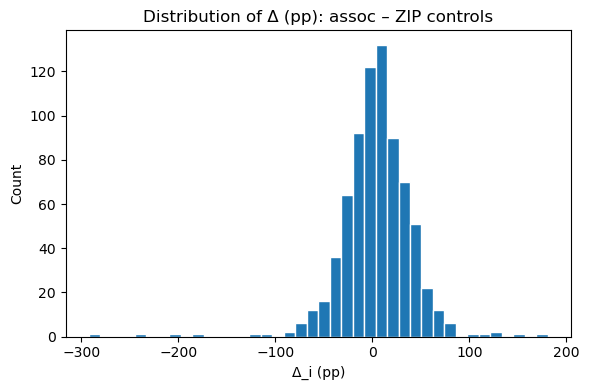

[Δ] Saved: exports/delta_all_vars\delta_assoc_zip_controls.csv

[Sanity] panel rows by window × is_gse:
2019–2021: {0: 414, 1: 2483}
2022–2024: {0: 485, 1: 799}

[Run] LTV 19_21_gse  | n=2229  R²=0.151
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.151
Model:                            WLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     48.56
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          1.42e-202
Time:                        15:00:45   Log-Likelihood:                 1665.2
No. Observations:                2229   AIC:                            -3078.
Df Residuals:                    2103   BIC:                            -2359.
Df Model:                         125                                         
Covariance Type:              cluster                                         
        

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 128, but rank is 83
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 41
  warnings.warn('covariance of constraints does not have full '



[Run] LTV 19_21_nongse  | n=348  R²=0.304
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.304
Model:                            WLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     9.031
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           7.65e-29
Time:                        15:00:45   Log-Likelihood:                 313.22
No. Observations:                 348   AIC:                            -476.4
Df Residuals:                     273   BIC:                            -187.5
Df Model:                          74                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 26
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 37, but rank is 14
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 19_21_gse  | n=2229  R²=0.245
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.245
Model:                            WLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          5.54e-292
Time:                        15:00:45   Log-Likelihood:                 9705.6
No. Observations:                2229   AIC:                        -1.916e+04
Df Residuals:                    2103   BIC:                        -1.844e+04
Df Model:                         125                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 128, but rank is 83
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 41
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 22_24_gse  | n=724  R²=0.143
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.143
Model:                            WLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     31.84
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           4.72e-77
Time:                        15:00:45   Log-Likelihood:                 2857.6
No. Observations:                 724   AIC:                            -5569.
Df Residuals:                     651   BIC:                            -5234.
Df Model:                          72                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 26
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 37, but rank is 14
  warnings.warn('covariance of constraints does not have full '


In [7]:
# ==============================================
# Percent-Delta (relative to 1–2 stories) + lending splits (19–21 vs 22–24, GSE vs Non-GSE)
# Outputs: Δ distribution, used-rows CSVs, and two 4-column LaTeX BODY tables
# ==============================================
import os, re, numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm

# ---------------- PATHS ----------------
PATH_DTA_REDFIN = '../../final_datasets/master_datasets/master_dataset_assoc_quarter_redfin.dta'
PATH_WGTS       = '../../final_datasets/master_datasets/hoa_redfin_weights.dta'
PATH_DTA_LOANS  = '../../final_datasets/master_datasets/master_dataset_mcdash_lending.dta'
OUTPUT_DIR      = 'exports/delta_all_vars'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------- CORE COLS ----------------
ASSOC   = 'assoc_name_final'
ZIP     = 'zip5_attom'
COUNTY  = 'mm_fips_county_name_attom'
Q       = 'quarter'
HOA_PSF = 'hoa_sq_ft_assoc_qtr'
W_COL   = 'final_weight'

# ---------------- STORY / FILTERS ----------------
STORIES_COL     = 'num_stories_final_assoc'
CTRL_STORY_MAX  = 2        # 1–2 = control
TREAT_STORY_MIN = 3        # 3+  = eligible
EXCLUDE_MIAMI_BROWARD = True

# ---------------- WINDOWS ----------------
PRE_START      = pd.Timestamp('2019-01-01')
PRE_END        = pd.Timestamp('2022-03-31')   # through 2022 Q1
POST25_START   = pd.Timestamp('2025-01-01')   # calendar 2025
POST25_END     = pd.Timestamp('2025-12-31')

# Lending windows (for the 4-column tables)
LEND_A_START, LEND_A_END = pd.Timestamp('2019-01-01'), pd.Timestamp('2021-12-31')
LEND_B_START, LEND_B_END = pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31')

# ---------------- McDash columns ----------------
L_CLOSEDATE = 'sold_date_mcdash'
L_LTV       = 'originalltv'              # decimal [0,1]
L_RATE      = 'originalinterestrate'     # decimal (if spread not present)
L_SPREAD    = 'rate_spread'              # decimal (preferred)
L_SCORE     = 'originalcreditscore'      # may be missing
L_GSEFLAG   = 'gse'                      # NEW: binary 1/0 in dataset

# ---------------- FE TOGGLES ----------------
STAGE1_ZIP_FE, STAGE1_Q_FE = True, True
STAGE2_ZIP_FE, STAGE2_Q_FE = True, True
DEMEAN_CONTROLS_BY_Q       = False

# ---------------- COVARS (Stage 1; keep your set) ----------------
COVARS = [
    'gym_redfin_assoc','pool_redfin_assoc','spa_broad_redfin_assoc',
    'tennis_redfin_assoc','golf_redfin_assoc','garage_redfin_assoc',
    'boat_redfin_assoc','elevator_redfin_assoc','view_redfin_assoc',
    'senior_community_redfin_assoc','property_age_assoc_qtr',
    'frac_npexcorp_state_attom_assoc','frac_corp_own_attom_assoc',
    'corp_mgmt_city_attom_assoc'
]

# ---------------- Weights ----------------
WEIGHT_SCHEME = 'none'  # 'none'|'assoc_equal'|'mls_only'|'hybrid'
TRIM_MLS_P99  = True
NORM_MLS_BY_Q = True

# ---------------- Spread display & winsor ----------------
WINSOR_SPREAD  = True
WINSOR_LIMIT   = 0.03     # ±3pp

# ---------------- Utilities ----------------
def _to_qstart(x):
    dt = pd.to_datetime(x, errors='coerce')
    return pd.PeriodIndex(dt, freq='Q').to_timestamp(how='start')

def _ensure_numeric_df(X):
    for c in X.columns:
        if not np.issubdtype(X[c].dtype, np.number):
            X[c] = pd.to_numeric(X[c], errors='coerce')
    return X

def _weighted_mean(x, w):
    x, w = np.asarray(x, dtype='float64'), np.asarray(w, dtype='float64')
    m = np.isfinite(x) & np.isfinite(w) & (w > 0)
    if not m.any(): return np.nan
    return (x[m] * w[m]).sum() / w[m].sum()

def _maybe_q_demean(df, cols, qcol):
    if not DEMEAN_CONTROLS_BY_Q or not cols: return df[cols].copy()
    out = {}
    for c in cols:
        out[c] = pd.to_numeric(df[c], errors='coerce') - df.groupby(qcol)[c].transform('mean')
    return pd.DataFrame(out, index=df.index)

def _slug(s): return re.sub(r'[^a-zA-Z0-9]+','_', s).strip('_').lower()

print(f"[CONFIG] Stage1: ZIP FE={STAGE1_ZIP_FE}, Q FE={STAGE1_Q_FE} | Stage2: ZIP FE={STAGE2_ZIP_FE}, Q FE={STAGE2_Q_FE}")

# ============================================================
# STAGE 0: Load HOA panel + weights
# ============================================================
rf = pd.read_stata(PATH_DTA_REDFIN)
rf[Q] = _to_qstart(rf[Q])

wg = pd.read_stata(PATH_WGTS)[[ASSOC, Q, W_COL]].copy()
wg[Q] = _to_qstart(wg[Q])
wg[W_COL] = pd.to_numeric(wg[W_COL], errors='coerce').fillna(0)
if wg.duplicated([ASSOC, Q]).any():
    wg = wg.groupby([ASSOC, Q], as_index=False)[W_COL].sum()

rf = rf.merge(wg, on=[ASSOC, Q], how='left', validate='m:1')
rf[W_COL] = pd.to_numeric(rf[W_COL], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(1.0)

if EXCLUDE_MIAMI_BROWARD and COUNTY in rf.columns:
    cty = (rf[COUNTY].astype(str).str.upper().str.strip()
           .str.replace(r'\s*COUNTY$', '', regex=True))
    rf = rf.loc[~cty.isin(['MIAMI-DADE','MIAMI DADE','BROWARD'])].copy()

rf = rf.loc[
    ((rf[Q] >= PRE_START) & (rf[Q] <= PRE_END)) |
    ((rf[Q] >= POST25_START) & (rf[Q] <= POST25_END))
].copy()

rf['eligible'] = pd.to_numeric(rf[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN
rf['is_ctrl']  = pd.to_numeric(rf[STORIES_COL], errors='coerce') <= CTRL_STORY_MAX

# ============================================================
# STAGE 1: Δ_i (pp) relative to ZIP controls
# ============================================================
rf['ln_hoa_psf'] = np.log(pd.to_numeric(rf[HOA_PSF], errors='coerce'))
rf['period'] = np.select(
    [
        (rf[Q] >= PRE_START)    & (rf[Q] <= PRE_END),
        (rf[Q] >= POST25_START) & (rf[Q] <= POST25_END),
    ],
    ['pre', 'post'],
    default=np.nan
)

need_cols = [ASSOC, ZIP, Q, 'period', 'ln_hoa_psf', W_COL, 'eligible', 'is_ctrl']
r0 = rf.loc[rf['period'].isin(['pre','post']) & rf['ln_hoa_psf'].notna(), need_cols].copy()
print(f"[Δ] Raw rows in pre/post windows: {len(r0):,}")

parts = []
if STAGE1_ZIP_FE and ZIP in r0:
    parts.append(pd.get_dummies(r0[ZIP], prefix='zip', drop_first=True))
if STAGE1_Q_FE:
    parts.append(pd.get_dummies(r0[Q], prefix='q', drop_first=True))
X = _ensure_numeric_df(pd.concat(parts, axis=1))
X = sm.add_constant(X, has_constant='add')
y = r0['ln_hoa_psf'].astype(float)
w = pd.to_numeric(r0[W_COL], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(1.0)

ok = X.notna().all(1) & y.notna() & w.notna()
r1 = r0.loc[ok].copy()
X1 = X.loc[ok]; y1 = y.loc[ok]; w1 = w.loc[ok]
print(f"[Δ] Rows used in WLS: {len(r1):,} (dropped {len(r0)-len(r1):,})")

res = sm.WLS(y1, X1, weights=w1).fit()
r1['resid'] = y1 - res.predict(X1)

a_means = (r1.groupby([ASSOC,'period'])
             .apply(lambda d: _weighted_mean(d['resid'], d[W_COL]))
             .rename('rbar')
             .reset_index())
a_wide = a_means.pivot(index=ASSOC, columns='period', values='rbar') \
               .rename(columns={'pre':'a_pre','post':'a_post'})
a_wide = a_wide.loc[a_wide[['a_pre','a_post']].notna().all(1)].copy()
print(f"[Δ] Associations with both pre & post residual means: {len(a_wide):,}")

ctrl = r1.loc[r1['is_ctrl'] == True].copy()
if ctrl.empty:
    print("[Δ] WARNING: no controls; Δ will be empty.")
    delta = pd.DataFrame(columns=[ASSOC,'delta_pct'])
else:
    z_means = (ctrl.groupby([ZIP,'period'])
                 .apply(lambda d: _weighted_mean(d['resid'], d[W_COL]))
                 .rename('rbar')
                 .reset_index())
    z_wide = z_means.pivot(index=ZIP, columns='period', values='rbar') \
                    .rename(columns={'pre':'z_pre','post':'z_post'})
    z_wide = z_wide.loc[z_wide[['z_pre','z_post']].notna().all(1)].copy()
    print(f"[Δ] ZIPs with control pre & post: {len(z_wide):,}")

    elig = r1.loc[r1['eligible'] == True, [ASSOC, ZIP]].drop_duplicates()
    a2 = a_wide.merge(elig, on=ASSOC, how='inner').merge(z_wide, on=ZIP, how='left')
    before = len(a2); a2 = a2.dropna(subset=['z_pre','z_post'])
    print(f"[Δ] Dropped {before - len(a2):,} eligible assocs missing control ZIP window(s).")

    a2['delta_pct'] = 100.0 * ((a2['a_post'] - a2['a_pre']) - (a2['z_post'] - a2['z_pre']))
    delta = a2[[ASSOC,'delta_pct',ZIP,'a_pre','a_post','z_pre','z_post']].copy()

if delta.empty or not np.isfinite(delta['delta_pct']).any():
    print("[Δ] No valid Δ observations — skipping histogram.")
else:
    print("\n[Δ] Distribution (pp):\n", delta['delta_pct'].describe())
    delta[['delta_pct']].to_csv(os.path.join(OUTPUT_DIR,'delta_distribution.csv'), index=False)
    plt.figure(figsize=(6,4))
    plt.hist(delta['delta_pct'].dropna(), bins=40, edgecolor='white')
    plt.title('Distribution of Δ (pp): assoc – ZIP controls')
    plt.xlabel('Δ_i (pp)'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

delta_path = os.path.join(OUTPUT_DIR,'delta_assoc_zip_controls.csv')
delta.to_csv(delta_path, index=False)
print(f"[Δ] Saved: {delta_path}")

# ============================================================
# STAGE 2: Build lending panels + run the 8 regressions
# ============================================================
loans = pd.read_stata(PATH_DTA_LOANS)
loans[Q] = _to_qstart(loans[L_CLOSEDATE])

# attach county as in panel (for exclusions)
rf_cty = rf[[ASSOC, COUNTY]].drop_duplicates()
loans = loans.merge(rf_cty, on=ASSOC, how='left')
if EXCLUDE_MIAMI_BROWARD and COUNTY in loans.columns:
    cty = (loans[COUNTY].astype(str).str.upper().str.strip()
           .str.replace(r'\s*COUNTY$', '', regex=True))
    loans = loans.loc[~cty.isin(['MIAMI-DADE','MIAMI DADE','BROWARD'])].copy()

# keep only 3+ story associations
assoc_stories = rf[[ASSOC, STORIES_COL]].drop_duplicates()
loans = loans.merge(assoc_stories, on=ASSOC, how='left')
loans = loans.loc[pd.to_numeric(loans[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN].copy()

# main variables
loans['ltv']    = pd.to_numeric(loans[L_LTV], errors='coerce').clip(0,1)
loans['spread'] = (pd.to_numeric(loans[L_SPREAD], errors='coerce')
                   if L_SPREAD in loans.columns else
                   pd.to_numeric(loans[L_RATE], errors='coerce'))
if WINSOR_SPREAD:
    loans['spread'] = loans['spread'].clip(-WINSOR_LIMIT, WINSOR_LIMIT)
loans['score']  = pd.to_numeric(loans[L_SCORE], errors='coerce')

# >>>>>>>>>>>>  NEW: use dataset's GSE flag directly  <<<<<<<<<<<<
loans['is_gse'] = (pd.to_numeric(loans[L_GSEFLAG], errors='coerce') == 1).astype(int)

def _agg(df):
    return pd.Series({
        'n': len(df),
        'ltv_mean':    df['ltv'].mean(),
        'spread_mean': df['spread'].mean(),
        'score_mean':  df['score'].mean()
    })

panel = (loans.groupby([ASSOC, Q, 'is_gse'], as_index=False)
               .apply(_agg).reset_index(drop=True))

# bring ZIP for FE and Δ
zip_map = rf[[ASSOC, Q, ZIP]].drop_duplicates()
panel = panel.merge(zip_map, on=[ASSOC, Q], how='left')
panel = panel.merge(delta[[ASSOC,'delta_pct']], on=ASSOC, how='inner')

# attach weights (assoc×quarter MLS)
wg_q = wg.copy()
if wg_q.duplicated([ASSOC, Q]).any():
    wg_q = wg_q.groupby([ASSOC, Q], as_index=False)[W_COL].sum()
panel = panel.merge(wg_q, on=[ASSOC, Q], how='left', validate='m:1')
panel['w_mls'] = pd.to_numeric(panel[W_COL], errors='coerce').fillna(1.0)
if TRIM_MLS_P99:
    cap = np.nanpercentile(panel['w_mls'], 99)
    panel['w_mls'] = np.clip(panel['w_mls'], 0, cap)
if NORM_MLS_BY_Q:
    qmean = panel.groupby(Q)['w_mls'].transform('mean')
    panel['w_mls'] = (panel['w_mls'] / qmean).replace([np.inf,-np.inf], np.nan).fillna(1.0)

# --- sanity: counts by window × GSE ---
def _count(df, s, e):
    return df[(df[Q]>=s)&(df[Q]<=e)].groupby('is_gse')['n'].count()
print("\n[Sanity] panel rows by window × is_gse:")
print("2019–2021:", _count(panel, LEND_A_START, LEND_A_END).to_dict())
print("2022–2024:", _count(panel, LEND_B_START, LEND_B_END).to_dict())

# ---------- model builder ----------
def _design(df, y, controls, zip_fe=True, q_fe=True):
    parts = [df[['delta_pct']]]
    if controls:
        Xc = _maybe_q_demean(df, controls, Q) if q_fe else df[controls]
        parts.append(Xc)
    if zip_fe and ZIP in df.columns:
        parts.append(pd.get_dummies(df[ZIP], prefix='zip', drop_first=True))
    if q_fe:
        parts.append(pd.get_dummies(df[Q], prefix='q', drop_first=True))
    X = _ensure_numeric_df(pd.concat(parts, axis=1))
    X = sm.add_constant(X, has_constant='add')
    yv = pd.to_numeric(df[y], errors='coerce')
    m  = yv.notna() & X.notna().all(axis=1)
    Ti   = df.loc[m].groupby(ASSOC)[Q].transform('nunique').astype(float)
    w_eq = 1.0 / Ti.values
    w_m  = pd.to_numeric(df.loc[m, 'w_mls'], errors='coerce').fillna(1.0).values
    if WEIGHT_SCHEME == 'assoc_equal': w = w_eq
    elif WEIGHT_SCHEME == 'mls_only':  w = w_m
    elif WEIGHT_SCHEME == 'hybrid':    w = (w_eq * w_m) / np.nanmean(w_eq * w_m)
    else:                               w = np.ones_like(w_eq)
    return X.loc[m], yv.loc[m], w, df.loc[m, ASSOC], df.loc[m]

def _run(df, y, label, controls):
    if df.empty:
        print(f"[{label}] no rows"); return None
    X, yv, w, g, used = _design(df, y, controls, STAGE2_ZIP_FE, STAGE2_Q_FE)
    fit = sm.WLS(yv, X, weights=w).fit()
    fit = fit.get_robustcov_results(cov_type='cluster', groups=g)
    print(f"\n[Run] {label}  | n={int(fit.nobs)}  R²={fit.rsquared:.3f}")
    print(fit.summary())
    used.to_csv(os.path.join(OUTPUT_DIR, f"used_{_slug(label)}.csv"), index=False)
    return fit

def _slice(df, start, end, gse_flag):
    return df[(df[Q] >= start) & (df[Q] <= end) & (df['is_gse'] == gse_flag)].copy()

slices = {
    '19_21_gse':     _slice(panel, LEND_A_START, LEND_A_END, 1),
    '19_21_nongse':  _slice(panel, LEND_A_START, LEND_A_END, 0),
    '22_24_gse':     _slice(panel, LEND_B_START, LEND_B_END, 1),
    '22_24_nongse':  _slice(panel, LEND_B_START, LEND_B_END, 0),
}

# controls: LTV models get spread + score; spread models get LTV + score
ltv_controls    = ['spread_mean','score_mean']
spread_controls = ['ltv_mean','score_mean']

res_ltv    = {k: _run(v, 'ltv_mean',    f"LTV {k}",    ltv_controls)    for k,v in slices.items()}
res_spread = {k: _run(v, 'spread_mean', f"Spread {k}", spread_controls) for k,v in slices.items()}

# ============================================================
# LaTeX BODY writers (4 columns)
# ============================================================
STAR_THRESH = [(0.01,'***'),(0.05,'**'),(0.10,'*')]
def _stars(p):
    if p is None or not np.isfinite(p): return ''
    for thr,s in STAR_THRESH:
        if p < thr: return s
    return ''

def _coef(res, name):
    if res is None or not hasattr(res,'params'): return (np.nan,np.nan,np.nan)
    p, s, pv = res.params, res.bse, res.pvalues
    if hasattr(p,'index') and name in p.index:
        return float(p[name]), float(s[name]), float(pv[name])
    if hasattr(res.model,'exog_names') and name in res.model.exog_names:
        j = res.model.exog_names.index(name)
        return float(p[j]), float(s[j]), float(pv[j])
    return (np.nan,np.nan,np.nan)

def _fmt(b,se,p,scale=1.0,dec=3):
    if not np.isfinite(b): return ('','')
    return (f"{b*scale:.{dec}f}{_stars(p)}", f"({se*scale:.{dec}f})")

def _write_4col(table_res, rows, out_path, dec=3):
    order = ['19_21_gse','19_21_nongse','22_24_gse','22_24_nongse']
    hdr = r"& 2019--2021 GSE & 2019--2021 Non--GSE & 2022--2024 GSE & 2022--2024 Non--GSE \\"
    lines = [hdr, r"\midrule"]
    for name,label,scale in rows:
        cells, ses = [], []
        for k in order:
            b,se,p = _coef(table_res.get(k), name)
            c,t = _fmt(b,se,p,scale=scale,dec=dec)
            cells.append(c); ses.append(t)
        lines.append(f"{label} & " + " & ".join(cells) + r" \\")
        lines.append("& " + " & ".join(ses) + r" \\")
        lines.append(r"\addlinespace")
    R2 = [getattr(table_res.get(k),'rsquared',np.nan) for k in order]
    N  = [int(round(getattr(table_res.get(k),'nobs',np.nan))) for k in order]
    lines += [
        r"\midrule",
        rf"$R^2$ & {R2[0]:.3f} & {R2[1]:.3f} & {R2[2]:.3f} & {R2[3]:.3f} \\",
        rf"Observations & {N[0]} & {N[1]} & {N[2]} & {N[3]} \\",
        rf"ZIP FE & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} \\",
        rf"Quarter FE & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} \\",
    ]
    with open(out_path,'w',encoding='utf-8') as f:
        f.write("\n".join(lines) + "\n")

# LTV table: Δ (pp), spread (bps), credit score (/100)
_write_4col(
    res_ltv,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('spread_mean',r'Rate spread (bps)',          10000),
        ('score_mean', r'Credit score (per 100 pts)', 0.01),
    ],
    out_path=os.path.join(OUTPUT_DIR,'reg_ltv_4col.tex'),
    dec=3
)

# Spread table: Δ (pp), LTV (pp), credit score (/100)
_write_4col(
    res_spread,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('ltv_mean',   r'LTV (pp)',                   100),
        ('score_mean', r'Credit score (per 100 pts)', 0.01),
    ],
    out_path=os.path.join(OUTPUT_DIR,'reg_spread_4col.tex'),
    dec=3
)

print("[LaTeX] wrote:",
      os.path.join(OUTPUT_DIR,'reg_ltv_4col.tex'), "and",
      os.path.join(OUTPUT_DIR,'reg_spread_4col.tex'))


[CONFIG] Stage1: COUNTY FE=True, Q FE=True | Stage2: COUNTY FE=True, Q FE=True
[Δ] Raw rows in pre/post windows: 14,009
[Δ] Rows used in WLS: 11,382 (dropped 2,627)
[Δ] Associations with both pre & post residual means: 1,301
[Δ] Counties with control pre & post: 30
[Δ] Dropped 1 eligible assocs missing control COUNTY window(s).

[Δ] Distribution (pp):
 count    796.000000
mean       4.504162
std       29.987078
min     -273.445617
25%       -8.170689
50%        5.943505
75%       18.571161
max      172.737320
Name: delta_pct, dtype: float64


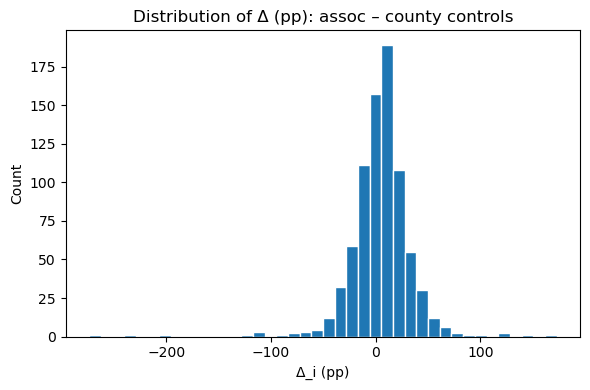

[Δ] Saved: exports/delta_all_vars\delta_assoc_county_controls.csv

[Sanity] panel rows by window × is_gse:
2019–2021: {0: 524, 1: 3081}
2022–2024: {0: 579, 1: 986}

[Run] LTV 19_21_gse  | n=2772  R²=0.093
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.093
Model:                            WLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     80.94
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          7.57e-205
Time:                        15:01:00   Log-Likelihood:                 2018.3
No. Observations:                2772   AIC:                            -3959.
Df Residuals:                    2733   BIC:                            -3728.
Df Model:                          38                                         
Covariance Type:              cluster                                         
     

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 40, but rank is 34
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 32, but rank is 28
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 19
  warnings.warn('covariance of constraints does not have full '



[Run] LTV 22_24_gse  | n=899  R²=0.059
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.059
Model:                            WLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     137.6
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          3.92e-170
Time:                        15:01:01   Log-Likelihood:                 552.11
No. Observations:                 899   AIC:                            -1056.
Df Residuals:                     875   BIC:                            -941.0
Df Model:                          23                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 40, but rank is 34
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 19_21_nongse  | n=439  R²=0.127
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.127
Model:                            WLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     9.011
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           4.13e-25
Time:                        15:01:01   Log-Likelihood:                 1782.9
No. Observations:                 439   AIC:                            -3502.
Df Residuals:                     407   BIC:                            -3371.
Df Model:                          31                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 32, but rank is 28
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 19
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 16
  warnings.warn('covariance of constraints does not have full '


In [8]:
# ==============================================
# Percent-Delta (relative to 1–2 stories) + lending splits (19–21 vs 22–24, GSE vs Non-GSE)
# COUNTY fixed effects version + coast-distance covariate in Stage 1
# Outputs: Δ distribution, used-rows CSVs, and two 4-column LaTeX BODY tables
# ==============================================
import os, re, numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm

# ---------------- PATHS ----------------
PATH_DTA_REDFIN = '../../final_datasets/master_datasets/master_dataset_assoc_quarter_redfin.dta'
PATH_WGTS       = '../../final_datasets/master_datasets/hoa_redfin_weights.dta'
PATH_DTA_LOANS  = '../../final_datasets/master_datasets/master_dataset_mcdash_lending.dta'
OUTPUT_DIR      = 'exports/delta_all_vars'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------- CORE COLS ----------------
ASSOC   = 'assoc_name_final'
COUNTY  = 'mm_fips_county_name_attom'   # << county everywhere
Q       = 'quarter'
HOA_PSF = 'hoa_sq_ft_assoc_qtr'
W_COL   = 'final_weight'

# ---------------- STORY / FILTERS ----------------
STORIES_COL     = 'num_stories_final_assoc'
CTRL_STORY_MAX  = 2        # 1–2 = control
TREAT_STORY_MIN = 3        # 3+  = eligible
EXCLUDE_MIAMI_BROWARD = True

# ---------------- WINDOWS ----------------
PRE_START      = pd.Timestamp('2019-01-01')
PRE_END        = pd.Timestamp('2022-03-31')   # through 2022 Q1
POST25_START   = pd.Timestamp('2025-01-01')   # calendar 2025
POST25_END     = pd.Timestamp('2025-12-31')

# Lending windows (for the 4-column tables)
LEND_A_START, LEND_A_END = pd.Timestamp('2019-01-01'), pd.Timestamp('2021-12-31')
LEND_B_START, LEND_B_END = pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31')

# ---------------- McDash columns ----------------
L_CLOSEDATE = 'sold_date_mcdash'
L_LTV       = 'originalltv'              # decimal [0,1]
L_RATE      = 'originalinterestrate'     # decimal (if spread not present)
L_SPREAD    = 'rate_spread'              # decimal (preferred)
L_SCORE     = 'originalcreditscore'      # may be missing
L_GSEFLAG   = 'gse'                      # binary 1/0 in dataset

# ---------------- FE TOGGLES ----------------
STAGE1_COUNTY_FE, STAGE1_Q_FE = True, True   # county FE
STAGE2_COUNTY_FE, STAGE2_Q_FE = True, True   # county FE for lending
DEMEAN_CONTROLS_BY_Q          = False

# ---------------- COVARS (Stage 1) ----------------
# Keep your original set and ADD the coast-distance dummy
COVARS = [
    'gym_redfin_assoc','pool_redfin_assoc','spa_broad_redfin_assoc',
    'tennis_redfin_assoc','golf_redfin_assoc','garage_redfin_assoc',
    'boat_redfin_assoc','elevator_redfin_assoc','view_redfin_assoc',
    'senior_community_redfin_assoc','property_age_assoc_qtr',
    'frac_npexcorp_state_attom_assoc','frac_corp_own_attom_assoc',
    'corp_mgmt_city_attom_assoc',
    'three_miles_coast_assoc'   # << NEW control
]

# ---------------- Weights ----------------
WEIGHT_SCHEME = 'none'  # 'none'|'assoc_equal'|'mls_only'|'hybrid'
TRIM_MLS_P99  = True
NORM_MLS_BY_Q = True

# ---------------- Spread display & winsor ----------------
WINSOR_SPREAD  = True
WINSOR_LIMIT   = 0.03     # ±3pp

# ---------------- Utilities ----------------
def _to_qstart(x):
    dt = pd.to_datetime(x, errors='coerce')
    return pd.PeriodIndex(dt, freq='Q').to_timestamp(how='start')

def _ensure_numeric_df(X):
    for c in X.columns:
        if not np.issubdtype(X[c].dtype, np.number):
            X[c] = pd.to_numeric(X[c], errors='coerce')
    return X

def _weighted_mean(x, w):
    x, w = np.asarray(x, dtype='float64'), np.asarray(w, dtype='float64')
    m = np.isfinite(x) & np.isfinite(w) & (w > 0)
    if not m.any(): return np.nan
    return (x[m] * w[m]).sum() / w[m].sum()

def _maybe_q_demean(df, cols, qcol):
    if not DEMEAN_CONTROLS_BY_Q or not cols: return df[cols].copy()
    out = {}
    for c in cols:
        out[c] = pd.to_numeric(df[c], errors='coerce') - df.groupby(qcol)[c].transform('mean')
    return pd.DataFrame(out, index=df.index)

def _slug(s): return re.sub(r'[^a-zA-Z0-9]+','_', s).strip('_').lower()

print(f"[CONFIG] Stage1: COUNTY FE={STAGE1_COUNTY_FE}, Q FE={STAGE1_Q_FE} | Stage2: COUNTY FE={STAGE2_COUNTY_FE}, Q FE={STAGE2_Q_FE}")

# ============================================================
# STAGE 0: Load HOA panel + weights
# ============================================================
rf = pd.read_stata(PATH_DTA_REDFIN)
rf[Q] = _to_qstart(rf[Q])

wg = pd.read_stata(PATH_WGTS)[[ASSOC, Q, W_COL]].copy()
wg[Q] = _to_qstart(wg[Q])
wg[W_COL] = pd.to_numeric(wg[W_COL], errors='coerce').fillna(0)
if wg.duplicated([ASSOC, Q]).any():
    wg = wg.groupby([ASSOC, Q], as_index=False)[W_COL].sum()

rf = rf.merge(wg, on=[ASSOC, Q], how='left', validate='m:1')
rf[W_COL] = pd.to_numeric(rf[W_COL], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(1.0)

if EXCLUDE_MIAMI_BROWARD and COUNTY in rf.columns:
    cty = (rf[COUNTY].astype(str).str.upper().str.strip()
           .str.replace(r'\s*COUNTY$', '', regex=True))
    rf = rf.loc[~cty.isin(['MIAMI-DADE','MIAMI DADE','BROWARD'])].copy()

rf = rf.loc[
    ((rf[Q] >= PRE_START) & (rf[Q] <= PRE_END)) |
    ((rf[Q] >= POST25_START) & (rf[Q] <= POST25_END))
].copy()

rf['eligible'] = pd.to_numeric(rf[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN
rf['is_ctrl']  = pd.to_numeric(rf[STORIES_COL], errors='coerce') <= CTRL_STORY_MAX

# ============================================================
# STAGE 1: Δ_i (pp) relative to COUNTY controls
# ============================================================
rf['ln_hoa_psf'] = np.log(pd.to_numeric(rf[HOA_PSF], errors='coerce'))
rf['period'] = np.select(
    [
        (rf[Q] >= PRE_START)    & (rf[Q] <= PRE_END),
        (rf[Q] >= POST25_START) & (rf[Q] <= POST25_END),
    ],
    ['pre', 'post'],
    default=np.nan
)

need_cols = [ASSOC, COUNTY, Q, 'period', 'ln_hoa_psf', W_COL, 'eligible', 'is_ctrl'] + COVARS
r0 = rf.loc[rf['period'].isin(['pre','post']) & rf['ln_hoa_psf'].notna(), need_cols].copy()
print(f"[Δ] Raw rows in pre/post windows: {len(r0):,}")

# --- design matrix: county FE, quarter FE, + covariates
parts = []
if COVARS:
    parts.append(_maybe_q_demean(r0, COVARS, Q) if STAGE1_Q_FE else r0[COVARS])
if STAGE1_COUNTY_FE and COUNTY in r0:
    parts.append(pd.get_dummies(r0[COUNTY], prefix='county', drop_first=True))
if STAGE1_Q_FE:
    parts.append(pd.get_dummies(r0[Q], prefix='q', drop_first=True))
X = _ensure_numeric_df(pd.concat(parts, axis=1)) if parts else pd.DataFrame(index=r0.index)
X = sm.add_constant(X, has_constant='add')
y = r0['ln_hoa_psf'].astype(float)
w = pd.to_numeric(r0[W_COL], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(1.0)

ok = X.notna().all(1) & y.notna() & w.notna()
r1 = r0.loc[ok].copy()
X1 = X.loc[ok]; y1 = y.loc[ok]; w1 = w.loc[ok]
print(f"[Δ] Rows used in WLS: {len(r1):,} (dropped {len(r0)-len(r1):,})")

res = sm.WLS(y1, X1, weights=w1).fit()
r1['resid'] = y1 - res.predict(X1)

# Assoc-level residual means pre/post
a_means = (r1.groupby([ASSOC,'period'])
             .apply(lambda d: _weighted_mean(d['resid'], d[W_COL]))
             .rename('rbar')
             .reset_index())
a_wide = a_means.pivot(index=ASSOC, columns='period', values='rbar') \
               .rename(columns={'pre':'a_pre','post':'a_post'})
a_wide = a_wide.loc[a_wide[['a_pre','a_post']].notna().all(1)].copy()
print(f"[Δ] Associations with both pre & post residual means: {len(a_wide):,}")

# County-level control residual means pre/post (1–2 story only)
ctrl = r1.loc[r1['is_ctrl'] == True].copy()
if ctrl.empty:
    print("[Δ] WARNING: no controls; Δ will be empty.")
    delta = pd.DataFrame(columns=[ASSOC,'delta_pct'])
else:
    c_means = (ctrl.groupby([COUNTY,'period'])
                 .apply(lambda d: _weighted_mean(d['resid'], d[W_COL]))
                 .rename('rbar')
                 .reset_index())
    c_wide = c_means.pivot(index=COUNTY, columns='period', values='rbar') \
                    .rename(columns={'pre':'c_pre','post':'c_post'})
    c_wide = c_wide.loc[c_wide[['c_pre','c_post']].notna().all(1)].copy()
    print(f"[Δ] Counties with control pre & post: {len(c_wide):,}")

    elig = r1.loc[r1['eligible'] == True, [ASSOC, COUNTY]].drop_duplicates()
    a2 = a_wide.merge(elig, on=ASSOC, how='inner').merge(c_wide, on=COUNTY, how='left')
    before = len(a2); a2 = a2.dropna(subset=['c_pre','c_post'])
    print(f"[Δ] Dropped {before - len(a2):,} eligible assocs missing control COUNTY window(s).")

    # Percent-point Δ: (assoc Δ) – (county Δ)
    a2['delta_pct'] = 100.0 * ((a2['a_post'] - a2['a_pre']) - (a2['c_post'] - a2['c_pre']))
    delta = a2[[ASSOC,'delta_pct',COUNTY,'a_pre','a_post','c_pre','c_post']].copy()

if delta.empty or not np.isfinite(delta['delta_pct']).any():
    print("[Δ] No valid Δ observations — skipping histogram.")
else:
    print("\n[Δ] Distribution (pp):\n", delta['delta_pct'].describe())
    delta[['delta_pct']].to_csv(os.path.join(OUTPUT_DIR,'delta_distribution.csv'), index=False)
    plt.figure(figsize=(6,4))
    plt.hist(delta['delta_pct'].dropna(), bins=40, edgecolor='white')
    plt.title('Distribution of Δ (pp): assoc – county controls')
    plt.xlabel('Δ_i (pp)'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

delta_path = os.path.join(OUTPUT_DIR,'delta_assoc_county_controls.csv')
delta.to_csv(delta_path, index=False)
print(f"[Δ] Saved: {delta_path}")

# ============================================================
# STAGE 2: Build lending panels + run the 8 regressions
# ============================================================
loans = pd.read_stata(PATH_DTA_LOANS)
loans[Q] = _to_qstart(loans[L_CLOSEDATE])

# attach county from panel (for exclusions and FE)
rf_cty = rf[[ASSOC, COUNTY]].drop_duplicates()
loans = loans.merge(rf_cty, on=ASSOC, how='left')
if EXCLUDE_MIAMI_BROWARD and COUNTY in loans.columns:
    cty = (loans[COUNTY].astype(str).str.upper().str.strip()
           .str.replace(r'\s*COUNTY$', '', regex=True))
    loans = loans.loc[~cty.isin(['MIAMI-DADE','MIAMI DADE','BROWARD'])].copy()

# keep only 3+ story associations
assoc_stories = rf[[ASSOC, STORIES_COL]].drop_duplicates()
loans = loans.merge(assoc_stories, on=ASSOC, how='left')
loans = loans.loc[pd.to_numeric(loans[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN].copy()

# main variables
loans['ltv']    = pd.to_numeric(loans[L_LTV], errors='coerce').clip(0,1)
loans['spread'] = (pd.to_numeric(loans[L_SPREAD], errors='coerce')
                   if L_SPREAD in loans.columns else
                   pd.to_numeric(loans[L_RATE], errors='coerce'))
if WINSOR_SPREAD:
    loans['spread'] = loans['spread'].clip(-WINSOR_LIMIT, WINSOR_LIMIT)
loans['score']  = pd.to_numeric(loans[L_SCORE], errors='coerce')

# use dataset's GSE flag
loans['is_gse'] = (pd.to_numeric(loans[L_GSEFLAG], errors='coerce') == 1).astype(int)

def _agg(df):
    return pd.Series({
        'n': len(df),
        'ltv_mean':    df['ltv'].mean(),
        'spread_mean': df['spread'].mean(),
        'score_mean':  df['score'].mean()
    })

panel = (loans.groupby([ASSOC, Q, 'is_gse'], as_index=False)
               .apply(_agg).reset_index(drop=True))

# bring COUNTY for FE and Δ
county_map = rf[[ASSOC, Q, COUNTY]].drop_duplicates()
panel = panel.merge(county_map, on=[ASSOC, Q], how='left')
panel = panel.merge(delta[[ASSOC,'delta_pct']], on=ASSOC, how='inner')

# attach weights (assoc×quarter MLS) – optional for Stage 2 (default none)
wg_q = wg.copy()
if wg_q.duplicated([ASSOC, Q]).any():
    wg_q = wg_q.groupby([ASSOC, Q], as_index=False)[W_COL].sum()
panel = panel.merge(wg_q, on=[ASSOC, Q], how='left', validate='m:1')
panel['w_mls'] = pd.to_numeric(panel[W_COL], errors='coerce').fillna(1.0)
if TRIM_MLS_P99:
    cap = np.nanpercentile(panel['w_mls'], 99)
    panel['w_mls'] = np.clip(panel['w_mls'], 0, cap)
if NORM_MLS_BY_Q:
    qmean = panel.groupby(Q)['w_mls'].transform('mean')
    panel['w_mls'] = (panel['w_mls'] / qmean).replace([np.inf,-np.inf], np.nan).fillna(1.0)

# --- sanity: counts by window × GSE ---
def _count(df, s, e):
    return df[(df[Q]>=s)&(df[Q]<=e)].groupby('is_gse')['n'].count()
print("\n[Sanity] panel rows by window × is_gse:")
print("2019–2021:", _count(panel, LEND_A_START, LEND_A_END).to_dict())
print("2022–2024:", _count(panel, LEND_B_START, LEND_B_END).to_dict())

# ---------- model builder ----------
def _design(df, y, controls, county_fe=True, q_fe=True):
    parts = [df[['delta_pct']]]
    if controls:
        parts.append(df[controls])
    if county_fe and COUNTY in df.columns:
        parts.append(pd.get_dummies(df[COUNTY], prefix='county', drop_first=True))
    if q_fe:
        parts.append(pd.get_dummies(df[Q], prefix='q', drop_first=True))
    X = _ensure_numeric_df(pd.concat(parts, axis=1))
    X = sm.add_constant(X, has_constant='add')
    yv = pd.to_numeric(df[y], errors='coerce')
    m  = yv.notna() & X.notna().all(axis=1)
    Ti   = df.loc[m].groupby(ASSOC)[Q].transform('nunique').astype(float)
    w_eq = 1.0 / Ti.values
    w_m  = pd.to_numeric(df.loc[m, 'w_mls'], errors='coerce').fillna(1.0).values
    if WEIGHT_SCHEME == 'assoc_equal': w = w_eq
    elif WEIGHT_SCHEME == 'mls_only':  w = w_m
    elif WEIGHT_SCHEME == 'hybrid':    w = (w_eq * w_m) / np.nanmean(w_eq * w_m)
    else:                               w = np.ones_like(w_eq)
    return X.loc[m], yv.loc[m], w, df.loc[m, ASSOC], df.loc[m]

def _run(df, y, label, controls):
    if df.empty:
        print(f"[{label}] no rows"); return None
    X, yv, w, g, used = _design(df, y, controls, STAGE2_COUNTY_FE, STAGE2_Q_FE)
    fit = sm.WLS(yv, X, weights=w).fit()
    fit = fit.get_robustcov_results(cov_type='cluster', groups=g)
    print(f"\n[Run] {label}  | n={int(fit.nobs)}  R²={fit.rsquared:.3f}")
    print(fit.summary())
    used.to_csv(os.path.join(OUTPUT_DIR, f"used_{_slug(label)}.csv"), index=False)
    return fit

def _slice(df, start, end, gse_flag):
    return df[(df[Q] >= start) & (df[Q] <= end) & (df['is_gse'] == gse_flag)].copy()

slices = {
    '19_21_gse':     _slice(panel, LEND_A_START, LEND_A_END, 1),
    '19_21_nongse':  _slice(panel, LEND_A_START, LEND_A_END, 0),
    '22_24_gse':     _slice(panel, LEND_B_START, LEND_B_END, 1),
    '22_24_nongse':  _slice(panel, LEND_B_START, LEND_B_END, 0),
}

# controls: LTV models get spread + score; spread models get LTV + score
ltv_controls    = ['spread_mean','score_mean']
spread_controls = ['ltv_mean','score_mean']

res_ltv    = {k: _run(v, 'ltv_mean',    f"LTV {k}",    ltv_controls)    for k,v in slices.items()}
res_spread = {k: _run(v, 'spread_mean', f"Spread {k}", spread_controls) for k,v in slices.items()}

# ============================================================
# LaTeX BODY writers (4 columns)
# ============================================================
STAR_THRESH = [(0.01,'***'),(0.05,'**'),(0.10,'*')]
def _stars(p):
    if p is None or not np.isfinite(p): return ''
    for thr,s in STAR_THRESH:
        if p < thr: return s
    return ''

def _coef(res, name):
    if res is None or not hasattr(res,'params'): return (np.nan,np.nan,np.nan)
    p, s, pv = res.params, res.bse, res.pvalues
    if hasattr(p,'index') and name in p.index:
        return float(p[name]), float(s[name]), float(pv[name])
    if hasattr(res.model,'exog_names') and name in res.model.exog_names:
        j = res.model.exog_names.index(name)
        return float(p[j]), float(s[j]), float(pv[j])
    return (np.nan,np.nan,np.nan)

def _fmt(b,se,p,scale=1.0,dec=3):
    if not np.isfinite(b): return ('','')
    return (f"{b*scale:.{dec}f}{_stars(p)}", f"({se*scale:.{dec}f})")

def _write_4col(table_res, rows, out_path, dec=3):
    order = ['19_21_gse','19_21_nongse','22_24_gse','22_24_nongse']
    hdr = r"& 2019--2021 GSE & 2019--2021 Non--GSE & 2022--2024 GSE & 2022--2024 Non--GSE \\"
    lines = [hdr, r"\midrule"]
    for name,label,scale in rows:
        cells, ses = [], []
        for k in order:
            b,se,p = _coef(table_res.get(k), name)
            c,t = _fmt(b,se,p,scale=scale,dec=dec)
            cells.append(c); ses.append(t)
        lines.append(f"{label} & " + " & ".join(cells) + r" \\")
        lines.append("& " + " & ".join(ses) + r" \\")
        lines.append(r"\addlinespace")
    R2 = [getattr(table_res.get(k),'rsquared',np.nan) for k in order]
    N  = [int(round(getattr(table_res.get(k),'nobs',np.nan))) for k in order]
    lines += [
        r"\midrule",
        rf"$R^2$ & {R2[0]:.3f} & {R2[1]:.3f} & {R2[2]:.3f} & {R2[3]:.3f} \\",
        rf"Observations & {N[0]} & {N[1]} & {N[2]} & {N[3]} \\",
        rf"County FE & {'Yes' if STAGE2_COUNTY_FE else 'No'} & {'Yes' if STAGE2_COUNTY_FE else 'No'} & {'Yes' if STAGE2_COUNTY_FE else 'No'} & {'Yes' if STAGE2_COUNTY_FE else 'No'} \\",
        rf"Quarter FE & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} \\",
    ]
    with open(out_path,'w',encoding='utf-8') as f:
        f.write("\n".join(lines) + "\n")

# LTV table: Δ (pp), spread (bps), credit score (/100)
_write_4col(
    res_ltv,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('spread_mean',r'Rate spread (bps)',          10000),
        ('score_mean', r'Credit score (per 100 pts)', 0.01),
    ],
    out_path=os.path.join(OUTPUT_DIR,'reg_ltv_4col.tex'),
    dec=3
)

# Spread table: Δ (pp), LTV (pp), credit score (/100)
_write_4col(
    res_spread,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('ltv_mean',   r'LTV (pp)',                   100),
        ('score_mean', r'Credit score (per 100 pts)', 0.01),
    ],
    out_path=os.path.join(OUTPUT_DIR,'reg_spread_4col.tex'),
    dec=3
)

print("[LaTeX] wrote:",
      os.path.join(OUTPUT_DIR,'reg_ltv_4col.tex'), "and",
      os.path.join(OUTPUT_DIR,'reg_spread_4col.tex'))


[CONFIG] Stage1: ZIP FE=True, Q FE=True | Stage2: ZIP FE=True, Q FE=True
[Δ] Raw rows in pre/post windows: 14,009
[Δ] Rows used in WLS: 11,382 (dropped 2,627)
[Δ] Associations with both pre & post residual means + county controls: 1,276

[Δ] Distribution (pp):
 count    1276.000000
mean        6.053695
std        30.816853
min      -269.762268
25%        -8.316834
50%         5.478851
75%        20.809356
max       182.626647
Name: delta_pct, dtype: float64


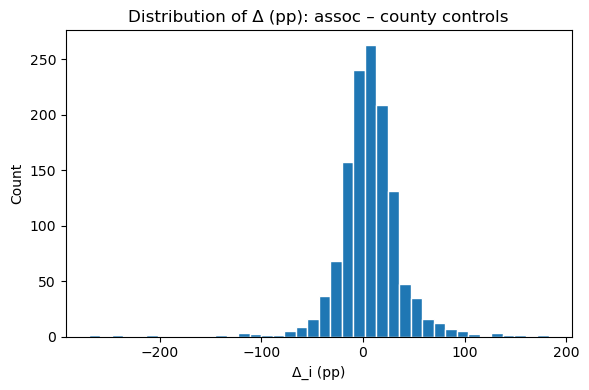

[Δ] Saved: exports/delta_all_vars\delta_assoc_county_controls.csv

[Sanity] panel rows by window × is_gse:
2019–2021: {0: 517, 1: 3045}
2022–2024: {0: 575, 1: 978}

[Run] LTV 19_21_gse  | n=2741  R²=0.158
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.158
Model:                            WLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     60.10
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           3.44e-56
Time:                        15:01:12   Log-Likelihood:                 2094.9
No. Observations:                2741   AIC:                            -3856.
Df Residuals:                    2574   BIC:                            -2868.
Df Model:                         166                                         
Covariance Type:              cluster                                         
     

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 169, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 100, but rank is 15
  warnings.warn('covariance of constraints does not have full '



[Run] LTV 19_21_nongse  | n=434  R²=0.353
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.353
Model:                            WLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     1296.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           5.95e-87
Time:                        15:01:13   Log-Likelihood:                 397.61
No. Observations:                 434   AIC:                            -611.2
Df Residuals:                     342   BIC:                            -236.5
Df Model:                          91                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 45, but rank is 3
  warnings.warn('covariance of constraints does not have full '


                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.082
Model:                            WLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                 1.735e+05
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           4.64e-73
Time:                        15:01:13   Log-Likelihood:                 263.10
No. Observations:                 520   AIC:                            -436.2
Df Residuals:                     475   BIC:                            -244.8
Df Model:                          44                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.83

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 169, but rank is 15
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 19_21_nongse  | n=434  R²=0.367
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.367
Model:                            WLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     78.27
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.36e-40
Time:                        15:01:13   Log-Likelihood:                 1830.9
No. Observations:                 434   AIC:                            -3478.
Df Residuals:                     342   BIC:                            -3103.
Df Model:                          91                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 100, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 4
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 22_24_nongse  | n=520  R²=0.160
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.160
Model:                            WLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                 3.001e+04
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.00e-59
Time:                        15:01:13   Log-Likelihood:                 1906.6
No. Observations:                 520   AIC:                            -3723.
Df Residuals:                     475   BIC:                            -3532.
Df Model:                          44                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 45, but rank is 3
  warnings.warn('covariance of constraints does not have full '


In [9]:
# ==============================================
# Percent-Delta (relative to 1–2 stories, county controls) + lending splits
# (19–21 vs 22–24, GSE vs Non-GSE)
# Outputs: Δ distribution, used-rows CSVs, and two 4-column LaTeX BODY tables
# ==============================================
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ---------------- PATHS ----------------
PATH_DTA_REDFIN = '../../final_datasets/master_datasets/master_dataset_assoc_quarter_redfin.dta'
PATH_WGTS       = '../../final_datasets/master_datasets/hoa_redfin_weights.dta'
PATH_DTA_LOANS  = '../../final_datasets/master_datasets/master_dataset_mcdash_lending.dta'
OUTPUT_DIR      = 'exports/delta_all_vars'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------- CORE COLS ----------------
ASSOC   = 'assoc_name_final'
ZIP     = 'zip5_attom'
COUNTY  = 'mm_fips_county_name_attom'
Q       = 'quarter'
HOA_PSF = 'hoa_sq_ft_assoc_qtr'
W_COL   = 'final_weight'

# ---------------- STORY / FILTERS ----------------
STORIES_COL     = 'num_stories_final_assoc'
CTRL_STORY_MAX  = 2        # 1–2 = control
TREAT_STORY_MIN = 3        # 3+  = eligible
EXCLUDE_MIAMI_BROWARD = True

# ---------------- WINDOWS ----------------
PRE_START      = pd.Timestamp('2019-01-01')
PRE_END        = pd.Timestamp('2022-03-31')   # through 2022 Q1
POST25_START   = pd.Timestamp('2025-01-01')   # calendar 2025
POST25_END     = pd.Timestamp('2025-12-31')

# Lending windows (for the 4-column tables)
LEND_A_START, LEND_A_END = pd.Timestamp('2019-01-01'), pd.Timestamp('2021-12-31')
LEND_B_START, LEND_B_END = pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31')

# ---------------- McDash columns ----------------
L_CLOSEDATE = 'sold_date_mcdash'
L_LTV       = 'originalltv'              # decimal [0,1]
L_RATE      = 'originalinterestrate'     # decimal (if spread not present)
L_SPREAD    = 'rate_spread'              # decimal (preferred)
L_SCORE     = 'originalcreditscore'      # may be missing
L_GSEFLAG   = 'gse'                      # binary 1/0 in dataset

# ---------------- FE TOGGLES ----------------
STAGE1_ZIP_FE, STAGE1_Q_FE = True, True
STAGE2_ZIP_FE, STAGE2_Q_FE = True, True
DEMEAN_CONTROLS_BY_Q       = False

# ---------------- COVARS (Stage 1; keep your set) ----------------
COVARS = [
    'gym_redfin_assoc','pool_redfin_assoc','spa_broad_redfin_assoc',
    'tennis_redfin_assoc','golf_redfin_assoc','garage_redfin_assoc',
    'boat_redfin_assoc','elevator_redfin_assoc','view_redfin_assoc',
    'senior_community_redfin_assoc','property_age_assoc_qtr',
    'frac_npexcorp_state_attom_assoc','frac_corp_own_attom_assoc',
    'corp_mgmt_city_attom_assoc'
]

# ---------------- Weights ----------------
WEIGHT_SCHEME = 'none'  # 'none'|'assoc_equal'|'mls_only'|'hybrid'
TRIM_MLS_P99  = True
NORM_MLS_BY_Q = True

# ---------------- Spread display & winsor ----------------
WINSOR_SPREAD  = True
WINSOR_LIMIT   = 0.03     # ±3pp

# ---------------- Utilities ----------------
def _to_qstart(x):
    dt = pd.to_datetime(x, errors='coerce')
    return pd.PeriodIndex(dt, freq='Q').to_timestamp(how='start')

def _ensure_numeric_df(X):
    for c in X.columns:
        if not np.issubdtype(X[c].dtype, np.number):
            X[c] = pd.to_numeric(X[c], errors='coerce')
    return X

def _weighted_mean(x, w):
    x, w = np.asarray(x, dtype='float64'), np.asarray(w, dtype='float64')
    m = np.isfinite(x) & np.isfinite(w) & (w > 0)
    if not m.any(): return np.nan
    return (x[m] * w[m]).sum() / w[m].sum()

def _maybe_q_demean(df, cols, qcol):
    if not DEMEAN_CONTROLS_BY_Q or not cols: return df[cols].copy()
    out = {}
    for c in cols:
        out[c] = pd.to_numeric(df[c], errors='coerce') - df.groupby(qcol)[c].transform('mean')
    return pd.DataFrame(out, index=df.index)

def _slug(s): return re.sub(r'[^a-zA-Z0-9]+','_', s).strip('_').lower()

print(f"[CONFIG] Stage1: ZIP FE={STAGE1_ZIP_FE}, Q FE={STAGE1_Q_FE} | Stage2: ZIP FE={STAGE2_ZIP_FE}, Q FE={STAGE2_Q_FE}")

# ============================================================
# STAGE 0: Load HOA panel + weights
# ============================================================
rf = pd.read_stata(PATH_DTA_REDFIN)
rf[Q] = _to_qstart(rf[Q])

wg = pd.read_stata(PATH_WGTS)[[ASSOC, Q, W_COL]].copy()
wg[Q] = _to_qstart(wg[Q])
wg[W_COL] = pd.to_numeric(wg[W_COL], errors='coerce').fillna(0)
if wg.duplicated([ASSOC, Q]).any():
    wg = wg.groupby([ASSOC, Q], as_index=False)[W_COL].sum()

rf = rf.merge(wg, on=[ASSOC, Q], how='left', validate='m:1')
rf[W_COL] = pd.to_numeric(rf[W_COL], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(1.0)

if EXCLUDE_MIAMI_BROWARD and COUNTY in rf.columns:
    cty = (rf[COUNTY].astype(str).str.upper().str.strip()
           .str.replace(r'\s*COUNTY$', '', regex=True))
    rf = rf.loc[~cty.isin(['MIAMI-DADE','MIAMI DADE','BROWARD'])].copy()

rf = rf.loc[
    ((rf[Q] >= PRE_START) & (rf[Q] <= PRE_END)) |
    ((rf[Q] >= POST25_START) & (rf[Q] <= POST25_END))
].copy()

rf['eligible'] = pd.to_numeric(rf[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN
rf['is_ctrl']  = pd.to_numeric(rf[STORIES_COL], errors='coerce') <= CTRL_STORY_MAX

# ============================================================
# STAGE 1: Δ_i (pp) relative to COUNTY controls (match capitalization code)
# ============================================================
rf['ln_hoa_psf'] = np.log(pd.to_numeric(rf[HOA_PSF], errors='coerce'))

rf['period'] = np.select(
    [
        (rf[Q] >= PRE_START)    & (rf[Q] <= PRE_END),
        (rf[Q] >= POST25_START) & (rf[Q] <= POST25_END),
    ],
    ['pre', 'post'],
    default=np.nan
)

# Keep only pre/post with valid ln(hoa)
# which covariates actually exist in rf?
covars_present = [c for c in COVARS if c in rf.columns]

need_cols = [ASSOC, COUNTY, ZIP, Q, 'period', 'ln_hoa_psf', W_COL, 'is_ctrl'] + covars_present

r0 = rf.loc[
    rf['period'].isin(['pre','post']) & rf['ln_hoa_psf'].notna(),
    need_cols
].copy()
print(f"[Δ] Raw rows in pre/post windows: {len(r0):,}")

parts = []
if covars_present:
    Xcov = r0[covars_present].copy()
    for c in Xcov.columns:
        Xcov[c] = pd.to_numeric(Xcov[c], errors='coerce')
    parts.append(Xcov)

if STAGE1_ZIP_FE and ZIP in r0.columns:
    parts.append(pd.get_dummies(r0[ZIP], prefix='zip', drop_first=True))
if STAGE1_Q_FE:
    parts.append(pd.get_dummies(r0[Q], prefix='q', drop_first=True))

X = _ensure_numeric_df(pd.concat(parts, axis=1))
X = sm.add_constant(X, has_constant='add')

y = r0['ln_hoa_psf'].astype(float)
w = pd.to_numeric(r0[W_COL], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(1.0)

ok = X.notna().all(1) & y.notna() & w.notna()
r1 = r0.loc[ok].copy()
X1 = X.loc[ok]; y1 = y.loc[ok]; w1 = w.loc[ok]
print(f"[Δ] Rows used in WLS: {len(r1):,} (dropped {len(r0)-len(r1):,})")

res = sm.WLS(y1, X1, weights=w1).fit()
r1['resid'] = res.resid

# County×quarter control means (1–2 stories)
ctrl = r1.loc[r1['is_ctrl'] == True].copy()
if ctrl.empty:
    print("[Δ] WARNING: no controls; Δ will be empty.")
    delta = pd.DataFrame(columns=[ASSOC,'delta_pct'])
else:
    c_means = (ctrl.groupby([COUNTY, Q], as_index=False)
                    .apply(lambda d: pd.Series({'rbar_c': _weighted_mean(d['resid'], d[W_COL])})))
    r1 = r1.merge(c_means, on=[COUNTY, Q], how='left')

    # Association-level a_bar and c_bar in pre/post
    ac_means = (r1.groupby([ASSOC, 'period'])
                  .apply(lambda d: pd.Series({
                      'a_bar': _weighted_mean(d['resid'],   d[W_COL]),
                      'c_bar': _weighted_mean(d['rbar_c'], d[W_COL])
                  }))
                  .reset_index())

    wide = (ac_means.pivot(index=ASSOC, columns='period', values=['a_bar','c_bar'])
                    .reset_index())

    # Flatten MultiIndex columns
    wide.columns = [ASSOC] + ['_'.join([a for a in c if a]) for c in wide.columns.tolist()[1:]]

    for c in ['a_bar_pre','a_bar_post','c_bar_pre','c_bar_post']:
        if c not in wide.columns:
            wide[c] = np.nan

    # Drop assocs missing either pre or post
    wide = wide.loc[wide[['a_bar_pre','a_bar_post','c_bar_pre','c_bar_post']].notna().all(1)].copy()
    print(f"[Δ] Associations with both pre & post residual means + county controls: {len(wide):,}")

    wide['delta_pct'] = 100.0 * (
        (wide['a_bar_post'] - wide['a_bar_pre']) -
        (wide['c_bar_post'] - wide['c_bar_pre'])
    )

    delta = wide[[ASSOC, 'delta_pct']].copy()

if delta.empty or not np.isfinite(delta['delta_pct']).any():
    print("[Δ] No valid Δ observations — skipping histogram.")
else:
    print("\n[Δ] Distribution (pp):\n", delta['delta_pct'].describe())
    delta[['delta_pct']].to_csv(os.path.join(OUTPUT_DIR,'delta_distribution.csv'), index=False)
    plt.figure(figsize=(6,4))
    plt.hist(delta['delta_pct'].dropna(), bins=40, edgecolor='white')
    plt.title('Distribution of Δ (pp): assoc – county controls')
    plt.xlabel('Δ_i (pp)'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

delta_path = os.path.join(OUTPUT_DIR,'delta_assoc_county_controls.csv')
delta.to_csv(delta_path, index=False)
print(f"[Δ] Saved: {delta_path}")

# ============================================================
# STAGE 2: Build lending panels + run the 8 regressions
# ============================================================
loans = pd.read_stata(PATH_DTA_LOANS)
loans[Q] = _to_qstart(loans[L_CLOSEDATE])

# attach county as in panel (for exclusions)
rf_cty = rf[[ASSOC, COUNTY]].drop_duplicates()
loans = loans.merge(rf_cty, on=ASSOC, how='left')
if EXCLUDE_MIAMI_BROWARD and COUNTY in loans.columns:
    cty = (loans[COUNTY].astype(str).str.upper().str.strip()
           .str.replace(r'\s*COUNTY$', '', regex=True))
    loans = loans.loc[~cty.isin(['MIAMI-DADE','MIAMI DADE','BROWARD'])].copy()

# keep only 3+ story associations
assoc_stories = rf[[ASSOC, STORIES_COL]].drop_duplicates()
loans = loans.merge(assoc_stories, on=ASSOC, how='left')
loans = loans.loc[pd.to_numeric(loans[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN].copy()

# main variables
loans['ltv']    = pd.to_numeric(loans[L_LTV], errors='coerce').clip(0,1)
loans['spread'] = (pd.to_numeric(loans[L_SPREAD], errors='coerce')
                   if L_SPREAD in loans.columns else
                   pd.to_numeric(loans[L_RATE], errors='coerce'))
if WINSOR_SPREAD:
    loans['spread'] = loans['spread'].clip(-WINSOR_LIMIT, WINSOR_LIMIT)
loans['score']  = pd.to_numeric(loans[L_SCORE], errors='coerce')

# GSE flag
loans['is_gse'] = (pd.to_numeric(loans[L_GSEFLAG], errors='coerce') == 1).astype(int)

def _agg(df):
    return pd.Series({
        'n': len(df),
        'ltv_mean':    df['ltv'].mean(),
        'spread_mean': df['spread'].mean(),
        'score_mean':  df['score'].mean()
    })

panel = (loans.groupby([ASSOC, Q, 'is_gse'], as_index=False)
               .apply(_agg).reset_index(drop=True))

# bring ZIP for FE and Δ
zip_map = rf[[ASSOC, Q, ZIP]].drop_duplicates()
panel = panel.merge(zip_map, on=[ASSOC, Q], how='left')
panel = panel.merge(delta[[ASSOC,'delta_pct']], on=ASSOC, how='inner')

# attach weights (assoc×quarter MLS)
wg_q = wg.copy()
if wg_q.duplicated([ASSOC, Q]).any():
    wg_q = wg_q.groupby([ASSOC, Q], as_index=False)[W_COL].sum()
panel = panel.merge(wg_q, on=[ASSOC, Q], how='left', validate='m:1')
panel['w_mls'] = pd.to_numeric(panel[W_COL], errors='coerce').fillna(1.0)
if TRIM_MLS_P99:
    cap = np.nanpercentile(panel['w_mls'], 99)
    panel['w_mls'] = np.clip(panel['w_mls'], 0, cap)
if NORM_MLS_BY_Q:
    qmean = panel.groupby(Q)['w_mls'].transform('mean')
    panel['w_mls'] = (panel['w_mls'] / qmean).replace([np.inf,-np.inf], np.nan).fillna(1.0)

# --- sanity: counts by window × GSE ---
def _count(df, s, e):
    return df[(df[Q]>=s)&(df[Q]<=e)].groupby('is_gse')['n'].count()
print("\n[Sanity] panel rows by window × is_gse:")
print("2019–2021:", _count(panel, LEND_A_START, LEND_A_END).to_dict())
print("2022–2024:", _count(panel, LEND_B_START, LEND_B_END).to_dict())

# ---------- model builder ----------
def _design(df, y, controls, zip_fe=True, q_fe=True):
    parts = [df[['delta_pct']]]
    if controls:
        Xc = _maybe_q_demean(df, controls, Q) if q_fe else df[controls]
        parts.append(Xc)
    if zip_fe and ZIP in df.columns:
        parts.append(pd.get_dummies(df[ZIP], prefix='zip', drop_first=True))
    if q_fe:
        parts.append(pd.get_dummies(df[Q], prefix='q', drop_first=True))

    X = _ensure_numeric_df(pd.concat(parts, axis=1))
    X = sm.add_constant(X, has_constant='add')

    yv = pd.to_numeric(df[y], errors='coerce')
    m  = yv.notna() & X.notna().all(axis=1)

    Ti   = df.loc[m].groupby(ASSOC)[Q].transform('nunique').astype(float)
    w_eq = 1.0 / Ti.values
    w_m  = pd.to_numeric(df.loc[m, 'w_mls'], errors='coerce').fillna(1.0).values
    if WEIGHT_SCHEME == 'assoc_equal':
        w = w_eq
    elif WEIGHT_SCHEME == 'mls_only':
        w = w_m
    elif WEIGHT_SCHEME == 'hybrid':
        w = (w_eq * w_m) / np.nanmean(w_eq * w_m)
    else:
        w = np.ones_like(w_eq)

    # CLUSTERING GROUP: make sure it's a pure string array (no floats)
    g = df.loc[m, ZIP].astype(str).fillna("missing_zip")

    return X.loc[m], yv.loc[m], w, g, df.loc[m]


def _run(df, y, label, controls):
    if df.empty:
        print(f"[{label}] no rows"); return None
    X, yv, w, g, used = _design(df, y, controls, STAGE2_ZIP_FE, STAGE2_Q_FE)
    fit = sm.WLS(yv, X, weights=w).fit()
    fit = fit.get_robustcov_results(cov_type='cluster', groups=g)
    print(f"\n[Run] {label}  | n={int(fit.nobs)}  R²={fit.rsquared:.3f}")
    print(fit.summary())
    used.to_csv(os.path.join(OUTPUT_DIR, f"used_{_slug(label)}.csv"), index=False)
    return fit

def _slice(df, start, end, gse_flag):
    return df[(df[Q] >= start) & (df[Q] <= end) & (df['is_gse'] == gse_flag)].copy()

slices = {
    '19_21_gse':     _slice(panel, LEND_A_START, LEND_A_END, 1),
    '19_21_nongse':  _slice(panel, LEND_A_START, LEND_A_END, 0),
    '22_24_gse':     _slice(panel, LEND_B_START, LEND_B_END, 1),
    '22_24_nongse':  _slice(panel, LEND_B_START, LEND_B_END, 0),
}

# controls: LTV models get spread + score; spread models get LTV + score
ltv_controls    = ['spread_mean','score_mean']
spread_controls = ['ltv_mean','score_mean']

res_ltv    = {k: _run(v, 'ltv_mean',    f"LTV {k}",    ltv_controls)    for k,v in slices.items()}
res_spread = {k: _run(v, 'spread_mean', f"Spread {k}", spread_controls) for k,v in slices.items()}

# ============================================================
# LaTeX BODY writers (4 columns)
# ============================================================
STAR_THRESH = [(0.01,'***'),(0.05,'**'),(0.10,'*')]
def _stars(p):
    if p is None or not np.isfinite(p): return ''
    for thr,s in STAR_THRESH:
        if p < thr: return s
    return ''


def _coef(res, name):
    if res is None or not hasattr(res,'params'): return (np.nan,np.nan,np.nan)
    p, s, pv = res.params, res.bse, res.pvalues
    if hasattr(p,'index') and name in p.index:
        return float(p[name]), float(s[name]), float(pv[name])
    if hasattr(res.model,'exog_names') and name in res.model.exog_names:
        j = res.model.exog_names.index(name)
        return float(p[j]), float(s[j]), float(pv[j])
    return (np.nan,np.nan,np.nan)

def _fmt(b,se,p,scale=1.0,dec=3):
    if not np.isfinite(b): return ('','')
    return (f"{b*scale:.{dec}f}{_stars(p)}", f"({se*scale:.{dec}f})")

def _write_4col(table_res, rows, out_path, dec=3):
    order = ['19_21_gse','19_21_nongse','22_24_gse','22_24_nongse']
    hdr = r"& 2019--2021 GSE & 2019--2021 Non--GSE & 2022--2024 GSE & 2022--2024 Non--GSE \\"
    lines = [hdr, r"\midrule"]
    for name,label,scale in rows:
        cells, ses = [], []
        for k in order:
            b,se,p = _coef(table_res.get(k), name)
            c,t = _fmt(b,se,p,scale=scale,dec=dec)
            cells.append(c); ses.append(t)
        lines.append(f"{label} & " + " & ".join(cells) + r" \\")
        lines.append("& " + " & ".join(ses) + r" \\")
        lines.append(r"\addlinespace")
    R2 = [getattr(table_res.get(k),'rsquared',np.nan) for k in order]
    N  = [int(round(getattr(table_res.get(k),'nobs',np.nan))) for k in order]
    lines += [
        r"\midrule",
        rf"$R^2$ & {R2[0]:.3f} & {R2[1]:.3f} & {R2[2]:.3f} & {R2[3]:.3f} \\",
        rf"Observations & {N[0]} & {N[1]} & {N[2]} & {N[3]} \\",
        rf"ZIP FE & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} \\",
        rf"Quarter FE & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} \\",
    ]
    with open(out_path,'w',encoding='utf-8') as f:
        f.write("\n".join(lines) + "\n")

# LTV table: Δ (pp), spread (bps), credit score (/100)
_write_4col(
    res_ltv,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('spread_mean',r'Rate spread (bps)',          10000),
        ('score_mean', r'Credit score (per 100 pts)', 0.01),
    ],
    out_path=os.path.join(OUTPUT_DIR,'reg_ltv_4col.tex'),
    dec=3
)

# Spread table: Δ (pp), LTV (pp), credit score (/100)
_write_4col(
    res_spread,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('ltv_mean',   r'LTV (pp)',                   100),
        ('score_mean', r'Credit score (per 100 pts)', 0.01),
    ],
    out_path=os.path.join(OUTPUT_DIR,'reg_spread_4col.tex'),
    dec=3
)

print("[LaTeX] wrote:",
      os.path.join(OUTPUT_DIR,'reg_ltv_4col.tex'), "and",
      os.path.join(OUTPUT_DIR,'reg_spread_4col.tex'))


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# -------------------------------------------------
# Helper functions
# -------------------------------------------------

def q_to_start(q):
    """
    Convert quarter-like data to quarter-start timestamps.
    Accepts Stata tq, strings like '2019Q1', or dates.
    """
    # If already Period with Q freq
    if pd.api.types.is_period_dtype(q):
        return q.to_timestamp(how='start')
    dt = pd.to_datetime(q, errors='coerce')
    return pd.PeriodIndex(dt, freq='Q').to_timestamp(how='start')


def wmean(x, w):
    """Weighted mean with NaN / nonpositive weight handling."""
    x = np.asarray(x, dtype="float64")
    w = np.asarray(w, dtype="float64")
    m = np.isfinite(x) & np.isfinite(w) & (w > 0)
    if not m.any():
        return np.nan
    return (x[m] * w[m]).sum() / w[m].sum()


def exclude_mia_broward(df, county_col):
    """Drop Miami-Dade and Broward (county name column)."""
    cty = (df[county_col].astype(str).str.upper().str.strip()
           .str.replace(r'\s*COUNTY$', '', regex=True))
    return df.loc[~cty.isin(['MIAMI-DADE', 'MIAMI DADE', 'BROWARD'])].copy()


# -------------------------------------------------
# SHARED Δ FUNCTION
# -------------------------------------------------

def compute_delta(
    rf,
    *,
    assoc_col,
    county_col,
    zip_col,
    q_col,
    stories_col,
    hoa_psf_col,
    w_col,
    covars,
    pre_start,
    pre_end,
    post_start,
    post_end,
    ctrl_story_max=2,
    risk_source=None,      # 'fema', 'firststreet', or None
    fema_col=None,
    fs_col=None,
    verbose=True
):
    """
    Compute association-level Δ_i in percentage points (pp).

    Exact definition:
        1. Run a weighted regression in the Redfin panel:

              ln(HOA/ft²)_a,q  ~  covariates_a,q
                                      + risk dummies
                                      + ZIP fixed effects
                                      + quarter fixed effects

           using WLS with weights = final_weight.

        2. Take the **residuals** from this regression.

        3. For each county c and quarter q, compute the weighted mean residual
           among the **control buildings** (1–2 stories):

              r̄_c,q = weighted mean of residuals among controls in county c, q.

        4. For each association i, compute *association* and *control* means
           in the pre and post windows:

              ā_i,pre  = w-avg residual for assoc i in pre window
              ā_i,post = w-avg residual for assoc i in post window
              c̄_i,pre  = w-avg r̄_c,q (county-control mean) for quarters
                           of assoc i in pre window
              c̄_i,post = same in post window

        5. Define

              Δ_i = 100 * [ (ā_i,post − ā_i,pre)
                           −(c̄_i,post − c̄_i,pre) ]

           i.e., percentage-point change in residual log HOA for i
           relative to the change for 1–2 story controls in the same counties.

    Returns
    -------
    delta : DataFrame with columns [assoc_col, 'delta_pct']
    res1  : statsmodels WLS results object from step (1).
    """
    rf = rf.copy()

    # --- quarters as quarter-start timestamps
    rf[q_col] = q_to_start(rf[q_col])

    # --- log HOA per sq ft
    rf['ln_hoa_psf'] = np.log(pd.to_numeric(rf[hoa_psf_col], errors='coerce'))

    # --- pre / post indicators
    rf['period'] = np.select(
        [
            (rf[q_col] >= pre_start) & (rf[q_col] <= pre_end),
            (rf[q_col] >= post_start) & (rf[q_col] <= post_end),
        ],
        ['pre', 'post'],
        default=np.nan
    )

    # --- which covariates / risk columns exist
    covars_present = [c for c in covars if c in rf.columns]

    risk_cols = []
    if risk_source == 'fema' and fema_col is not None and fema_col in rf.columns:
        risk_cols.append(fema_col)
    elif risk_source == 'firststreet' and fs_col is not None and fs_col in rf.columns:
        risk_cols.append(fs_col)

    base_cols = [assoc_col, county_col, zip_col, q_col,
                 'period', 'ln_hoa_psf', w_col, stories_col]
    needed = base_cols + covars_present + risk_cols

    # --- subset to pre/post rows with valid ln(HOA)
    r0 = rf.loc[
        rf['period'].isin(['pre', 'post']) & rf['ln_hoa_psf'].notna(),
        needed
    ].copy()

    if verbose:
        print(f"[Δ] Raw rows in pre/post windows: {len(r0):,}")

    # --- build X matrix for Stage 1: covariates + risk + ZIP FE + Q FE
    parts = []

    if covars_present:
        Xcov = r0[covars_present].copy()
        for c in Xcov.columns:
            Xcov[c] = pd.to_numeric(Xcov[c], errors='coerce')
        parts.append(Xcov)

    if risk_source == 'fema' and fema_col is not None and fema_col in r0.columns:
        parts.append(pd.get_dummies(r0[fema_col], prefix='fema', drop_first=True))
    elif risk_source == 'firststreet' and fs_col is not None and fs_col in r0.columns:
        parts.append(pd.get_dummies(r0[fs_col], prefix='fs', drop_first=True))

    # ZIP FE
    parts.append(
        pd.get_dummies(
            r0[zip_col].astype(str).str.upper().str.strip(),
            prefix='zip', drop_first=True
        )
    )
    # Quarter FE
    parts.append(pd.get_dummies(r0[q_col], prefix='q', drop_first=True))

    X = pd.concat(parts, axis=1)
    for c in X.columns:
        if not np.issubdtype(X[c].dtype, np.number):
            X[c] = pd.to_numeric(X[c], errors='coerce')
    X = sm.add_constant(X, has_constant='add')

    y = r0['ln_hoa_psf'].astype(float)
    w = pd.to_numeric(r0[w_col], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(1.0)

    ok = X.notna().all(axis=1) & y.notna() & w.notna()
    r1 = r0.loc[ok].copy()
    X1, y1, w1 = X.loc[ok], y.loc[ok], w.loc[ok]

    if verbose:
        print(f"[Δ] Rows used in WLS: {len(r1):,} (dropped {len(r0)-len(r1):,})")

    res1 = sm.WLS(y1, X1, weights=w1).fit()
    r1['resid'] = res1.resid

    # --- 1–2 story controls: county×quarter mean residuals
    is_ctrl = pd.to_numeric(r1[stories_col], errors='coerce') <= ctrl_story_max
    ctrl = r1.loc[is_ctrl].copy()
    if ctrl.empty:
        print("[Δ] WARNING: no controls; Δ will be empty.")
        return pd.DataFrame({assoc_col: [], 'delta_pct': []}), res1

    c_means = (ctrl
               .groupby([county_col, q_col], as_index=False)
               .apply(lambda d: pd.Series({'rbar_c': wmean(d['resid'], d[w_col])})))
    r1 = r1.merge(c_means, on=[county_col, q_col], how='left')

    # --- association-level pre/post means of own residual and control mean
    ac_means = (r1
        .groupby([assoc_col, 'period'])
        .apply(lambda d: pd.Series({
            'a_bar': wmean(d['resid'],   d[w_col]),
            'c_bar': wmean(d['rbar_c'], d[w_col])
        }))
        .reset_index()
    )

    wide = (ac_means
            .pivot(index=assoc_col, columns='period', values=['a_bar', 'c_bar'])
            .reset_index())

    # flatten column names
    wide.columns = [assoc_col] + [
        '_'.join([a for a in c if a]) for c in wide.columns.tolist()[1:]
    ]

    for c in ['a_bar_pre', 'a_bar_post', 'c_bar_pre', 'c_bar_post']:
        if c not in wide.columns:
            wide[c] = np.nan

    # require all four means to compute Δ
    wide = wide.loc[
        wide[['a_bar_pre', 'a_bar_post', 'c_bar_pre', 'c_bar_post']].notna().all(1)
    ].copy()

    if verbose:
        print(f"[Δ] Associations with both pre & post residual means + county controls: {len(wide):,}")

    wide['delta_pct'] = 100.0 * (
        (wide['a_bar_post'] - wide['a_bar_pre']) -
        (wide['c_bar_post'] - wide['c_bar_pre'])
    )

    delta = wide[[assoc_col, 'delta_pct']].copy()

    if verbose and not delta.empty:
        print("\n[Δ] Distribution (pp):")
        print(delta['delta_pct'].describe())

    return delta, res1


In [11]:
# ============================================================
# LENDING: McDash LTV / spread on Δ_i  (shared Δ method)
# ============================================================
import os
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


# ---------------- PATHS ----------------
# Use the SAME Redfin + weights as in the capitalization cell
PATH_DTA_REDFIN = '../../final_datasets/master_datasets/master_dataset_assoc_quarter_redfin.dta'
PATH_WGTS       = '../../final_datasets/master_datasets/hoa_redfin_weights.dta'
PATH_DTA_LOANS  = '../../final_datasets/master_datasets/master_dataset_mcdash_lending.dta'
OUTPUT_DIR      = 'exports/delta_all_vars'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------- CORE COLS ----------------
ASSOC_COL   = 'assoc_name_final'
COUNTY_COL  = 'mm_fips_county_name_attom'
ZIP_COL     = 'zip5_attom'
Q_COL       = 'quarter'
HOA_PSF_COL = 'hoa_sq_ft_assoc_qtr'
W_COL       = 'final_weight'
STORIES_COL = 'num_stories_final_assoc'

CTRL_STORY_MAX  = 2        # 1–2 = controls
TREAT_STORY_MIN = 3        # 3+  = treated / eligible
EXCLUDE_MIAMI_BROWARD = True

# ---------------- WINDOWS ----------------
# Δ_i windows (must match capitalization cell)
PRE_START     = pd.Timestamp('2019-01-01')
PRE_END       = pd.Timestamp('2022-03-31')   # through 2022Q1
POST25_START  = pd.Timestamp('2025-01-01')
POST25_END    = pd.Timestamp('2025-12-31')

# Lending outcome windows for the 4-column tables
LEND_A_START, LEND_A_END = pd.Timestamp('2019-01-01'), pd.Timestamp('2021-12-31')
LEND_B_START, LEND_B_END = pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31')

# ---------------- McDash columns ----------------
L_CLOSEDATE = 'sold_date_mcdash'     # loan closing date
L_LTV       = 'originalltv'          # decimal [0,1]
L_RATE      = 'originalinterestrate' # decimal if spread missing
L_SPREAD    = 'rate_spread'          # decimal over benchmark (preferred)
L_SCORE     = 'originalcreditscore'
L_GSEFLAG   = 'gse'                  # 1 = GSE, 0 = non-GSE

# ---------------- COVARIATES & RISK FOR Δ (same as capitalization) ----------------
COVARS = [
    'gym_redfin_assoc','pool_redfin_assoc','spa_broad_redfin_assoc',
    'tennis_redfin_assoc','golf_redfin_assoc','garage_redfin_assoc',
    'boat_redfin_assoc','elevator_redfin_assoc','view_redfin_assoc',
    'senior_community_redfin_assoc','property_age_assoc_qtr',
    'frac_npexcorp_state_attom_assoc','frac_corp_own_attom_assoc',
    'corp_mgmt_city_attom_assoc'
]

RISK_SOURCE = 'fema'          # 'fema', 'firststreet', or None
FEMA_COL    = 'fema_flood_risk_bucket_assoc'
FS_COL      = 'firststreet_risk_cat_assoc'

# ---------------- Stage 2 FE & weights ----------------
STAGE2_ZIP_FE, STAGE2_Q_FE = True, True
DEMEAN_CONTROLS_BY_Q       = False

WEIGHT_SCHEME = 'none'   # 'none'|'assoc_equal'|'mls_only'|'hybrid'
TRIM_MLS_P99  = True
NORM_MLS_BY_Q = True

WINSOR_SPREAD = True
WINSOR_LIMIT  = 0.03     # ±3pp around benchmark

# ----------------------------------------------------
# Helper utilities for Stage 2
# ----------------------------------------------------
def ensure_numeric_df(X):
    for c in X.columns:
        if not np.issubdtype(X[c].dtype, np.number):
            X[c] = pd.to_numeric(X[c], errors='coerce')
    return X

def maybe_q_demean(df, cols, qcol):
    if not DEMEAN_CONTROLS_BY_Q or not cols:
        return df[cols].copy()
    out = {}
    for c in cols:
        out[c] = pd.to_numeric(df[c], errors='coerce') - df.groupby(qcol)[c].transform('mean')
    return pd.DataFrame(out, index=df.index)

def slug(s):
    return re.sub(r'[^a-zA-Z0-9]+', '_', s).strip('_').lower()

print("[CONFIG] Lending regressions | shared Δ_i (same as capitalization)")
print(f"         ZIP FE={STAGE2_ZIP_FE}, Quarter FE={STAGE2_Q_FE}, Weight scheme={WEIGHT_SCHEME}")

# ============================================================
# STAGE 1: Load Redfin panel, compute Δ_i (pp) with shared method
# ============================================================

# Load Redfin HOA panel
rf = pd.read_stata(PATH_DTA_REDFIN)

# Load weights and harmonize quarters
wg = pd.read_stata(PATH_WGTS)[[ASSOC_COL, Q_COL, W_COL]].copy()
wg[Q_COL] = q_to_start(wg[Q_COL])
wg[W_COL] = pd.to_numeric(wg[W_COL], errors='coerce').fillna(0)

# Aggregate any duplicate assoc×quarter weights
if wg.duplicated([ASSOC_COL, Q_COL]).any():
    wg = wg.groupby([ASSOC_COL, Q_COL], as_index=False)[W_COL].sum()

# Harmonize quarters in rf and merge weights
rf[Q_COL] = q_to_start(rf[Q_COL])
rf = rf.merge(wg, on=[ASSOC_COL, Q_COL], how='left', validate='m:1')
rf[W_COL] = pd.to_numeric(rf[W_COL], errors='coerce').fillna(1.0)

# Exclude Miami-Dade & Broward
if EXCLUDE_MIAMI_BROWARD and COUNTY_COL in rf.columns:
    rf = exclude_mia_broward(rf, COUNTY_COL)

# Compute Δ_i (exactly same as capitalization cell)
delta, res_stage1 = compute_delta(
    rf,
    assoc_col=ASSOC_COL,
    county_col=COUNTY_COL,
    zip_col=ZIP_COL,
    q_col=Q_COL,
    stories_col=STORIES_COL,
    hoa_psf_col=HOA_PSF_COL,
    w_col=W_COL,
    covars=COVARS,
    pre_start=PRE_START,
    pre_end=PRE_END,
    post_start=POST25_START,
    post_end=POST25_END,
    ctrl_story_max=CTRL_STORY_MAX,
    risk_source=RISK_SOURCE,
    fema_col=FEMA_COL,
    fs_col=FS_COL,
    verbose=True
)

# Describe summary → two-column table
delta_desc = delta['delta_pct'].describe().to_frame(name='value')
delta_desc.index.name = 'statistic'
delta_desc.reset_index(inplace=True)

# Export to LaTeX (raw table)
latex_path = os.path.join(OUTPUT_DIR, "delta_distribution.tex")
delta_desc.to_latex(
    latex_path,
    index=False,
    float_format="%.4f",
    header=["statistic", "value"]
)

print(f"Exported delta distribution to {latex_path}")

# ------------------ HISTOGRAM EXPORT ------------------

plt.figure(figsize=(7,5))
plt.hist(delta['delta_pct'], bins=40, edgecolor='black')
plt.xlabel("Δ_i (percentage points)")
plt.ylabel("Frequency")
plt.title("Distribution of Δ_i")

hist_path = os.path.join(OUTPUT_DIR, "delta_histogram.png")
plt.savefig(hist_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Exported histogram to {hist_path}")

# ============================================================
# STAGE 2: Build McDash association–quarter panel
# ============================================================
loans = pd.read_stata(PATH_DTA_LOANS)

# Convert loan closing date to quarter-start
loans[Q_COL] = q_to_start(loans[L_CLOSEDATE])

# Attach county and stories from rf
meta = rf[[ASSOC_COL, COUNTY_COL, STORIES_COL, ZIP_COL]].drop_duplicates()
loans = loans.merge(meta, on=ASSOC_COL, how='left')

# Exclude Miami-Dade & Broward
if EXCLUDE_MIAMI_BROWARD and COUNTY_COL in loans.columns:
    loans = exclude_mia_broward(loans, COUNTY_COL)

# Keep only 3+ story associations
loans = loans[pd.to_numeric(loans[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN].copy()

# Main variables at loan level
loans['ltv']    = pd.to_numeric(loans[L_LTV],   errors='coerce').clip(0, 1)
loans['spread'] = (pd.to_numeric(loans[L_SPREAD], errors='coerce')
                   if L_SPREAD in loans.columns else
                   pd.to_numeric(loans[L_RATE],   errors='coerce'))
if WINSOR_SPREAD:
    loans['spread'] = loans['spread'].clip(-WINSOR_LIMIT, WINSOR_LIMIT)
loans['score']  = pd.to_numeric(loans[L_SCORE], errors='coerce')
loans['is_gse'] = (pd.to_numeric(loans[L_GSEFLAG], errors='coerce') == 1).astype(int)

# Aggregate to assoc×quarter×GSE panel
def agg_panel(df):
    return pd.Series({
        'n':           len(df),
        'ltv_mean':    df['ltv'].mean(),
        'spread_mean': df['spread'].mean(),
        'score_mean':  df['score'].mean()
    })

panel = (loans
         .groupby([ASSOC_COL, Q_COL, 'is_gse'], as_index=False)
         .apply(agg_panel)
         .reset_index(drop=True))

# Attach ZIP (for FE / clustering) and Δ_i
zip_map = rf[[ASSOC_COL, Q_COL, ZIP_COL]].drop_duplicates()
panel = panel.merge(zip_map, on=[ASSOC_COL, Q_COL], how='left')
panel = panel.merge(delta, on=ASSOC_COL, how='inner')

# Attach MLS weights as W_mls for the lending regressions
wg_q = wg.copy()
if wg_q.duplicated([ASSOC_COL, Q_COL]).any():
    wg_q = wg_q.groupby([ASSOC_COL, Q_COL], as_index=False)[W_COL].sum()

panel = panel.merge(wg_q, on=[ASSOC_COL, Q_COL], how='left', validate='m:1')
panel['w_mls'] = pd.to_numeric(panel[W_COL], errors='coerce').fillna(1.0)

# Trim extreme weights and normalize by quarter if desired
if TRIM_MLS_P99:
    cap = np.nanpercentile(panel['w_mls'], 99)
    panel['w_mls'] = np.clip(panel['w_mls'], 0, cap)

if NORM_MLS_BY_Q:
    qmean = panel.groupby(Q_COL)['w_mls'].transform('mean')
    panel['w_mls'] = (panel['w_mls'] / qmean).replace([np.inf, -np.inf], np.nan).fillna(1.0)

# Sanity check: counts by window × GSE status
def count_by_window(df, s, e):
    return df[(df[Q_COL] >= s) & (df[Q_COL] <= e)].groupby('is_gse')['n'].count()

print("\n[Sanity] panel rows by window × is_gse:")
print("2019–2021:", count_by_window(panel, LEND_A_START, LEND_A_END).to_dict())
print("2022–2024:", count_by_window(panel, LEND_B_START, LEND_B_END).to_dict())

# ============================================================
# STAGE 3: Run lending regressions
# ============================================================

def design_lend(df, y, controls, zip_fe=True, q_fe=True):
    """
    Build X matrix with:
      - Δ_i (pp)
      - controls (LTV or spread mean and score mean)
      - ZIP FE and quarter FE
    Compute weights according to WEIGHT_SCHEME and return X, y, weights, cluster groups.
    """
    parts = [df[['delta_pct']]]

    if controls:
        Xc = maybe_q_demean(df, controls, Q_COL) if (q_fe and DEMEAN_CONTROLS_BY_Q) else df[controls]
        parts.append(Xc)

    if zip_fe and ZIP_COL in df.columns:
        parts.append(pd.get_dummies(df[ZIP_COL], prefix='zip', drop_first=True))
    if q_fe:
        parts.append(pd.get_dummies(df[Q_COL], prefix='q', drop_first=True))

    X = ensure_numeric_df(pd.concat(parts, axis=1))
    X = sm.add_constant(X, has_constant='add')

    yv = pd.to_numeric(df[y], errors='coerce')
    m = yv.notna() & X.notna().all(axis=1)

    # Weighting: association-equal vs MLS weights vs hybrid vs none
    Ti   = df.loc[m].groupby(ASSOC_COL)[Q_COL].transform('nunique').astype(float)
    w_eq = 1.0 / Ti.values
    w_m  = pd.to_numeric(df.loc[m, 'w_mls'], errors='coerce').fillna(1.0).values

    if WEIGHT_SCHEME == 'assoc_equal':
        w = w_eq
    elif WEIGHT_SCHEME == 'mls_only':
        w = w_m
    elif WEIGHT_SCHEME == 'hybrid':
        w = (w_eq * w_m) / np.nanmean(w_eq * w_m)
    else:  # 'none'
        w = np.ones_like(w_eq)

    g = df.loc[m, ZIP_COL].astype(str).fillna("missing_zip")   # cluster by ZIP

    return X.loc[m], yv.loc[m], w, g, df.loc[m]

def run_lend(df, y, label, controls):
    if df.empty:
        print(f"[{label}] no rows")
        return None
    X, yv, w, g, used = design_lend(df, y, controls, STAGE2_ZIP_FE, STAGE2_Q_FE)
    fit = sm.WLS(yv, X, weights=w).fit()
    fit = fit.get_robustcov_results(cov_type='cluster', groups=g)
    print(f"\n[Run] {label} | n={int(fit.nobs)}  R²={fit.rsquared:.3f}")
    print(fit.summary())
    used.to_csv(os.path.join(OUTPUT_DIR, f"used_{slug(label)}.csv"), index=False)
    return fit

def slice_window(df, start, end, gse_flag):
    return df[(df[Q_COL] >= start) & (df[Q_COL] <= end) & (df['is_gse'] == gse_flag)].copy()

slices = {
    '19_21_gse':    slice_window(panel, LEND_A_START, LEND_A_END, 1),
    '19_21_nongse': slice_window(panel, LEND_A_START, LEND_A_END, 0),
    '22_24_gse':    slice_window(panel, LEND_B_START, LEND_B_END, 1),
    '22_24_nongse': slice_window(panel, LEND_B_START, LEND_B_END, 0),
}

# Controls:
#  - LTV models: spread_mean + score_mean
#  - Spread models: ltv_mean + score_mean
ltv_controls    = ['spread_mean', 'score_mean']
spread_controls = ['ltv_mean',   'score_mean']

res_ltv    = {k: run_lend(v, 'ltv_mean',    f"LTV {k}",    ltv_controls)    for k, v in slices.items()}
res_spread = {k: run_lend(v, 'spread_mean', f"Spread {k}", spread_controls) for k, v in slices.items()}

# ============================================================
# STAGE 4: LaTeX 4-column bodies (LTV and spread)
# ============================================================
STAR_THRESH = [(0.01, '***'), (0.05, '**'), (0.10, '*')]

def stars(p):
    if p is None or not np.isfinite(p):
        return ''
    for thr, s in STAR_THRESH:
        if p < thr:
            return s
    return ''

def coef_from_res(res, name):
    if res is None or not hasattr(res, 'params'):
        return (np.nan, np.nan, np.nan)
    p, s, pv = res.params, res.bse, res.pvalues
    if hasattr(p, 'index') and name in p.index:
        return float(p[name]), float(s[name]), float(pv[name])
    if hasattr(res.model, 'exog_names') and name in res.model.exog_names:
        j = res.model.exog_names.index(name)
        return float(p[j]), float(s[j]), float(pv[j])
    return (np.nan, np.nan, np.nan)

def fmt_coef(b, se, p, scale=1.0, dec=3):
    if not np.isfinite(b):
        return ('', '')
    return (f"{b*scale:.{dec}f}{stars(p)}", f"({se*scale:.{dec}f})")

def write_4col(table_res, rows, out_path, dec=3):
    """
    table_res: dict with keys '19_21_gse', '19_21_nongse', '22_24_gse', '22_24_nongse'
    rows: [(param_name, label, scale), ...]
    """
    order = ['19_21_gse', '19_21_nongse', '22_24_gse', '22_24_nongse']
    hdr = r"& 2019--2021 GSE & 2019--2021 Non--GSE & 2022--2024 GSE & 2022--2024 Non--GSE \\"
    lines = [hdr, r"\midrule"]

    for name, label, scale in rows:
        cells, ses = [], []
        for k in order:
            b, se, p = coef_from_res(table_res.get(k), name)
            c, s = fmt_coef(b, se, p, scale=scale, dec=dec)
            cells.append(c)
            ses.append(s)
        lines.append(f"{label} & " + " & ".join(cells) + r" \\")
        lines.append("& " + " & ".join(ses) + r" \\")
        lines.append(r"\addlinespace")

    # Fit stats
    R2 = [getattr(table_res.get(k), 'rsquared', np.nan) for k in order]
    N  = [int(round(getattr(table_res.get(k), 'nobs', np.nan))) for k in order]

    lines += [
        r"\midrule",
        rf"$R^2$ & {R2[0]:.3f} & {R2[1]:.3f} & {R2[2]:.3f} & {R2[3]:.3f} \\",
        rf"Observations & {N[0]} & {N[1]} & {N[2]} & {N[3]} \\",
        rf"ZIP FE & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} \\",
        rf"Quarter FE & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} \\",
    ]

    with open(out_path, 'w', encoding='utf-8') as f:
        f.write("\n".join(lines) + "\n")

    print(f"[LaTeX] Wrote {out_path}")

# LTV table: Δ_i (pp), rate spread (bps), credit score (/100)
write_4col(
    res_ltv,
    rows=[
        ('delta_pct',   r'$\Delta_i$ (pp)',            1),
        ('spread_mean', r'Rate spread (bps)',          0.0001),
        ('score_mean',  r'Credit score (per 100 pts)', 100),
    ],
    out_path=os.path.join(OUTPUT_DIR, 'reg_ltv_4col.tex'),
    dec=4
)

# Spread table: Δ_i (pp), LTV (pp), credit score (/100)
write_4col(
    res_spread,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('ltv_mean',   r'LTV (pp)',                   100),
        ('score_mean', r'Credit score (per 100 pts)', 100),
    ],
    out_path=os.path.join(OUTPUT_DIR, 'reg_spread_4col.tex'),
    dec=5
)

print("\n[Done] LaTeX bodies saved:",
      os.path.join(OUTPUT_DIR, 'reg_ltv_4col.tex'),
      "and",
      os.path.join(OUTPUT_DIR, 'reg_spread_4col.tex'))


[CONFIG] Lending regressions | shared Δ_i (same as capitalization)
         ZIP FE=True, Quarter FE=True, Weight scheme=none
[Δ] Raw rows in pre/post windows: 14,009
[Δ] Rows used in WLS: 11,382 (dropped 2,627)
[Δ] Associations with both pre & post residual means + county controls: 1,276

[Δ] Distribution (pp):
count    1276.000000
mean        5.774647
std        30.759039
min      -270.261056
25%        -8.442632
50%         5.200342
75%        20.393092
max       182.796828
Name: delta_pct, dtype: float64
Exported delta distribution to exports/delta_all_vars\delta_distribution.tex


C:\Users\ngodin\AppData\Local\Temp\ipykernel_3228\2354214997.py:154: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  delta_desc.to_latex(


Exported histogram to exports/delta_all_vars\delta_histogram.png

[Sanity] panel rows by window × is_gse:
2019–2021: {0: 517, 1: 3045}
2022–2024: {0: 575, 1: 978}

[Run] LTV 19_21_gse | n=2741  R²=0.158
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.158
Model:                            WLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     60.09
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           3.48e-56
Time:                        15:01:25   Log-Likelihood:                 2094.9
No. Observations:                2741   AIC:                            -3856.
Df Residuals:                    2574   BIC:                            -2868.
Df Model:                         166                                         
Covariance Type:              cluster                                         
       

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 169, but rank is 15
  warnings.warn('covariance of constraints does not have full '



[Run] LTV 19_21_nongse | n=434  R²=0.353
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.353
Model:                            WLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     1347.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.34e-87
Time:                        15:01:26   Log-Likelihood:                 397.56
No. Observations:                 434   AIC:                            -611.1
Df Residuals:                     342   BIC:                            -236.4
Df Model:                          91                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 100, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 130, but rank is 8
  warnings.warn('covariance of constraints does not have full '


                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.192
Model:                            WLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     54.99
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           2.93e-36
Time:                        15:01:26   Log-Likelihood:                 618.12
No. Observations:                 893   AIC:                            -986.2
Df Residuals:                     768   BIC:                            -386.9
Df Model:                         124                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.96

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 118, but rank is 10
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 19_21_gse | n=2741  R²=0.255
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.255
Model:                            WLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     80.14
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           2.02e-64
Time:                        15:01:26   Log-Likelihood:                 11942.
No. Observations:                2741   AIC:                        -2.355e+04
Df Residuals:                    2574   BIC:                        -2.256e+04
Df Model:                         166                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 169, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 100, but rank is 15
  warnings.warn('covariance of constraints does not have full '


                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.367
Model:                            WLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     77.86
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.64e-40
Time:                        15:01:26   Log-Likelihood:                 1830.9
No. Observations:                 434   AIC:                            -3478.
Df Residuals:                     342   BIC:                            -3103.
Df Model:                          91                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 130, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 118, but rank is 10
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 22_24_nongse | n=520  R²=0.312
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.312
Model:                            WLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     39.06
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           4.37e-31
Time:                        15:01:27   Log-Likelihood:                 1958.5
No. Observations:                 520   AIC:                            -3687.
Df Residuals:                     405   BIC:                            -3198.
Df Model:                         114                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [2]:
# ============================================================
# LENDING: McDash LTV / spread on Δ_i  (shared Δ method); effective age 
# ============================================================
import os
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


# ---------------- PATHS ----------------
# Use the SAME Redfin + weights as in the capitalization cell
PATH_DTA_REDFIN = '../../final_datasets/master_datasets/master_dataset_assoc_quarter_redfin.dta'
PATH_WGTS       = '../../final_datasets/master_datasets/hoa_redfin_weights.dta'
PATH_DTA_LOANS  = '../../final_datasets/master_datasets/master_dataset_mcdash_lending.dta'
OUTPUT_DIR      = 'exports/delta_all_vars'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------- CORE COLS ----------------
ASSOC_COL   = 'assoc_name_final'
COUNTY_COL  = 'mm_fips_county_name_attom'
ZIP_COL     = 'zip5_attom'
Q_COL       = 'quarter'
HOA_PSF_COL = 'hoa_sq_ft_assoc_qtr'
W_COL       = 'final_weight'
STORIES_COL = 'num_stories_final_assoc'

CTRL_STORY_MAX  = 2        # 1–2 = controls
TREAT_STORY_MIN = 3        # 3+  = treated / eligible
EXCLUDE_MIAMI_BROWARD = True

# ---------------- WINDOWS ----------------
# Δ_i windows (must match capitalization cell)
PRE_START     = pd.Timestamp('2019-01-01')
PRE_END       = pd.Timestamp('2022-03-31')   # through 2022Q1
POST25_START  = pd.Timestamp('2025-01-01')
POST25_END    = pd.Timestamp('2025-12-31')

# Lending outcome windows for the 4-column tables
LEND_A_START, LEND_A_END = pd.Timestamp('2019-01-01'), pd.Timestamp('2021-12-31')
LEND_B_START, LEND_B_END = pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31')

# ---------------- McDash columns ----------------
L_CLOSEDATE = 'sold_date_mcdash'     # loan closing date
L_LTV       = 'originalltv'          # decimal [0,1]
L_RATE      = 'originalinterestrate' # decimal if spread missing
L_SPREAD    = 'rate_spread'          # decimal over benchmark (preferred)
L_SCORE     = 'originalcreditscore'
L_GSEFLAG   = 'gse'                  # 1 = GSE, 0 = non-GSE

# ---------------- COVARIATES & RISK FOR Δ (same as capitalization) ----------------
COVARS = [
    'gym_redfin_assoc','pool_redfin_assoc','spa_broad_redfin_assoc',
    'tennis_redfin_assoc','golf_redfin_assoc','garage_redfin_assoc',
    'boat_redfin_assoc','elevator_redfin_assoc','view_redfin_assoc',
    'senior_community_redfin_assoc','property_age_assoc_qtr','property_age_effect_assoc_qtr',
    'frac_npexcorp_state_attom_assoc','frac_corp_own_attom_assoc',
    'corp_mgmt_city_attom_assoc'
]

RISK_SOURCE = 'fema'          # 'fema', 'firststreet', or None
FEMA_COL    = 'fema_flood_risk_bucket_assoc'
FS_COL      = 'firststreet_risk_cat_assoc'

# ---------------- Stage 2 FE & weights ----------------
STAGE2_ZIP_FE, STAGE2_Q_FE = True, True
DEMEAN_CONTROLS_BY_Q       = False

WEIGHT_SCHEME = 'none'   # 'none'|'assoc_equal'|'mls_only'|'hybrid'
TRIM_MLS_P99  = True
NORM_MLS_BY_Q = True

WINSOR_SPREAD = True
WINSOR_LIMIT  = 0.03     # ±3pp around benchmark

# ----------------------------------------------------
# Helper utilities for Stage 2
# ----------------------------------------------------
def ensure_numeric_df(X):
    for c in X.columns:
        if not np.issubdtype(X[c].dtype, np.number):
            X[c] = pd.to_numeric(X[c], errors='coerce')
    return X

def maybe_q_demean(df, cols, qcol):
    if not DEMEAN_CONTROLS_BY_Q or not cols:
        return df[cols].copy()
    out = {}
    for c in cols:
        out[c] = pd.to_numeric(df[c], errors='coerce') - df.groupby(qcol)[c].transform('mean')
    return pd.DataFrame(out, index=df.index)

def slug(s):
    return re.sub(r'[^a-zA-Z0-9]+', '_', s).strip('_').lower()

print("[CONFIG] Lending regressions | shared Δ_i (same as capitalization)")
print(f"         ZIP FE={STAGE2_ZIP_FE}, Quarter FE={STAGE2_Q_FE}, Weight scheme={WEIGHT_SCHEME}")

# ============================================================
# STAGE 1: Load Redfin panel, compute Δ_i (pp) with shared method
# ============================================================

# Load Redfin HOA panel
rf = pd.read_stata(PATH_DTA_REDFIN)

# Load weights and harmonize quarters
wg = pd.read_stata(PATH_WGTS)[[ASSOC_COL, Q_COL, W_COL]].copy()
wg[Q_COL] = q_to_start(wg[Q_COL])
wg[W_COL] = pd.to_numeric(wg[W_COL], errors='coerce').fillna(0)

# Aggregate any duplicate assoc×quarter weights
if wg.duplicated([ASSOC_COL, Q_COL]).any():
    wg = wg.groupby([ASSOC_COL, Q_COL], as_index=False)[W_COL].sum()

# Harmonize quarters in rf and merge weights
rf[Q_COL] = q_to_start(rf[Q_COL])
rf = rf.merge(wg, on=[ASSOC_COL, Q_COL], how='left', validate='m:1')
rf[W_COL] = pd.to_numeric(rf[W_COL], errors='coerce').fillna(1.0)

# Exclude Miami-Dade & Broward
if EXCLUDE_MIAMI_BROWARD and COUNTY_COL in rf.columns:
    rf = exclude_mia_broward(rf, COUNTY_COL)

# Compute Δ_i (exactly same as capitalization cell)
delta, res_stage1 = compute_delta(
    rf,
    assoc_col=ASSOC_COL,
    county_col=COUNTY_COL,
    zip_col=ZIP_COL,
    q_col=Q_COL,
    stories_col=STORIES_COL,
    hoa_psf_col=HOA_PSF_COL,
    w_col=W_COL,
    covars=COVARS,
    pre_start=PRE_START,
    pre_end=PRE_END,
    post_start=POST25_START,
    post_end=POST25_END,
    ctrl_story_max=CTRL_STORY_MAX,
    risk_source=RISK_SOURCE,
    fema_col=FEMA_COL,
    fs_col=FS_COL,
    verbose=True
)

# Describe summary → two-column table
delta_desc = delta['delta_pct'].describe().to_frame(name='value')
delta_desc.index.name = 'statistic'
delta_desc.reset_index(inplace=True)

# Export to LaTeX (raw table)
latex_path = os.path.join(OUTPUT_DIR, "delta_distribution_effect_age.tex")
delta_desc.to_latex(
    latex_path,
    index=False,
    float_format="%.4f",
    header=["statistic", "value"]
)

print(f"Exported delta distribution to {latex_path}")

# ------------------ HISTOGRAM EXPORT ------------------

plt.figure(figsize=(7,5))
plt.hist(delta['delta_pct'], bins=40, edgecolor='black')
plt.xlabel("Δ_i (percentage points)")
plt.ylabel("Frequency")
plt.title("Distribution of Δ_i")

hist_path = os.path.join(OUTPUT_DIR, "delta_histogram_effect_age.png")
plt.savefig(hist_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Exported histogram to {hist_path}")

# ============================================================
# STAGE 2: Build McDash association–quarter panel
# ============================================================
loans = pd.read_stata(PATH_DTA_LOANS)

# Convert loan closing date to quarter-start
loans[Q_COL] = q_to_start(loans[L_CLOSEDATE])

# Attach county and stories from rf
meta = rf[[ASSOC_COL, COUNTY_COL, STORIES_COL, ZIP_COL]].drop_duplicates()
loans = loans.merge(meta, on=ASSOC_COL, how='left')

# Exclude Miami-Dade & Broward
if EXCLUDE_MIAMI_BROWARD and COUNTY_COL in loans.columns:
    loans = exclude_mia_broward(loans, COUNTY_COL)

# Keep only 3+ story associations
loans = loans[pd.to_numeric(loans[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN].copy()

# Main variables at loan level
loans['ltv']    = pd.to_numeric(loans[L_LTV],   errors='coerce').clip(0, 1)
loans['spread'] = (pd.to_numeric(loans[L_SPREAD], errors='coerce')
                   if L_SPREAD in loans.columns else
                   pd.to_numeric(loans[L_RATE],   errors='coerce'))
if WINSOR_SPREAD:
    loans['spread'] = loans['spread'].clip(-WINSOR_LIMIT, WINSOR_LIMIT)
loans['score']  = pd.to_numeric(loans[L_SCORE], errors='coerce')
loans['is_gse'] = (pd.to_numeric(loans[L_GSEFLAG], errors='coerce') == 1).astype(int)

# Aggregate to assoc×quarter×GSE panel
def agg_panel(df):
    return pd.Series({
        'n':           len(df),
        'ltv_mean':    df['ltv'].mean(),
        'spread_mean': df['spread'].mean(),
        'score_mean':  df['score'].mean()
    })

panel = (loans
         .groupby([ASSOC_COL, Q_COL, 'is_gse'], as_index=False)
         .apply(agg_panel)
         .reset_index(drop=True))

# Attach ZIP (for FE / clustering) and Δ_i
zip_map = rf[[ASSOC_COL, Q_COL, ZIP_COL]].drop_duplicates()
panel = panel.merge(zip_map, on=[ASSOC_COL, Q_COL], how='left')
panel = panel.merge(delta, on=ASSOC_COL, how='inner')

# Attach MLS weights as W_mls for the lending regressions
wg_q = wg.copy()
if wg_q.duplicated([ASSOC_COL, Q_COL]).any():
    wg_q = wg_q.groupby([ASSOC_COL, Q_COL], as_index=False)[W_COL].sum()

panel = panel.merge(wg_q, on=[ASSOC_COL, Q_COL], how='left', validate='m:1')
panel['w_mls'] = pd.to_numeric(panel[W_COL], errors='coerce').fillna(1.0)

# Trim extreme weights and normalize by quarter if desired
if TRIM_MLS_P99:
    cap = np.nanpercentile(panel['w_mls'], 99)
    panel['w_mls'] = np.clip(panel['w_mls'], 0, cap)

if NORM_MLS_BY_Q:
    qmean = panel.groupby(Q_COL)['w_mls'].transform('mean')
    panel['w_mls'] = (panel['w_mls'] / qmean).replace([np.inf, -np.inf], np.nan).fillna(1.0)

# Sanity check: counts by window × GSE status
def count_by_window(df, s, e):
    return df[(df[Q_COL] >= s) & (df[Q_COL] <= e)].groupby('is_gse')['n'].count()

print("\n[Sanity] panel rows by window × is_gse:")
print("2019–2021:", count_by_window(panel, LEND_A_START, LEND_A_END).to_dict())
print("2022–2024:", count_by_window(panel, LEND_B_START, LEND_B_END).to_dict())

# ============================================================
# STAGE 3: Run lending regressions
# ============================================================

def design_lend(df, y, controls, zip_fe=True, q_fe=True):
    """
    Build X matrix with:
      - Δ_i (pp)
      - controls (LTV or spread mean and score mean)
      - ZIP FE and quarter FE
    Compute weights according to WEIGHT_SCHEME and return X, y, weights, cluster groups.
    """
    parts = [df[['delta_pct']]]

    if controls:
        Xc = maybe_q_demean(df, controls, Q_COL) if (q_fe and DEMEAN_CONTROLS_BY_Q) else df[controls]
        parts.append(Xc)

    if zip_fe and ZIP_COL in df.columns:
        parts.append(pd.get_dummies(df[ZIP_COL], prefix='zip', drop_first=True))
    if q_fe:
        parts.append(pd.get_dummies(df[Q_COL], prefix='q', drop_first=True))

    X = ensure_numeric_df(pd.concat(parts, axis=1))
    X = sm.add_constant(X, has_constant='add')

    yv = pd.to_numeric(df[y], errors='coerce')
    m = yv.notna() & X.notna().all(axis=1)

    # Weighting: association-equal vs MLS weights vs hybrid vs none
    Ti   = df.loc[m].groupby(ASSOC_COL)[Q_COL].transform('nunique').astype(float)
    w_eq = 1.0 / Ti.values
    w_m  = pd.to_numeric(df.loc[m, 'w_mls'], errors='coerce').fillna(1.0).values

    if WEIGHT_SCHEME == 'assoc_equal':
        w = w_eq
    elif WEIGHT_SCHEME == 'mls_only':
        w = w_m
    elif WEIGHT_SCHEME == 'hybrid':
        w = (w_eq * w_m) / np.nanmean(w_eq * w_m)
    else:  # 'none'
        w = np.ones_like(w_eq)

    g = df.loc[m, ZIP_COL].astype(str).fillna("missing_zip")   # cluster by ZIP

    return X.loc[m], yv.loc[m], w, g, df.loc[m]

def run_lend(df, y, label, controls):
    if df.empty:
        print(f"[{label}] no rows")
        return None
    X, yv, w, g, used = design_lend(df, y, controls, STAGE2_ZIP_FE, STAGE2_Q_FE)
    fit = sm.WLS(yv, X, weights=w).fit()
    fit = fit.get_robustcov_results(cov_type='cluster', groups=g)
    print(f"\n[Run] {label} | n={int(fit.nobs)}  R²={fit.rsquared:.3f}")
    print(fit.summary())
    used.to_csv(os.path.join(OUTPUT_DIR, f"used_{slug(label)}.csv"), index=False)
    return fit

def slice_window(df, start, end, gse_flag):
    return df[(df[Q_COL] >= start) & (df[Q_COL] <= end) & (df['is_gse'] == gse_flag)].copy()

slices = {
    '19_21_gse':    slice_window(panel, LEND_A_START, LEND_A_END, 1),
    '19_21_nongse': slice_window(panel, LEND_A_START, LEND_A_END, 0),
    '22_24_gse':    slice_window(panel, LEND_B_START, LEND_B_END, 1),
    '22_24_nongse': slice_window(panel, LEND_B_START, LEND_B_END, 0),
}

# Controls:
#  - LTV models: spread_mean + score_mean
#  - Spread models: ltv_mean + score_mean
ltv_controls    = ['spread_mean', 'score_mean']
spread_controls = ['ltv_mean',   'score_mean']

res_ltv    = {k: run_lend(v, 'ltv_mean',    f"LTV {k}",    ltv_controls)    for k, v in slices.items()}
res_spread = {k: run_lend(v, 'spread_mean', f"Spread {k}", spread_controls) for k, v in slices.items()}

# ============================================================
# STAGE 4: LaTeX 4-column bodies (LTV and spread)
# ============================================================
STAR_THRESH = [(0.01, '***'), (0.05, '**'), (0.10, '*')]

def stars(p):
    if p is None or not np.isfinite(p):
        return ''
    for thr, s in STAR_THRESH:
        if p < thr:
            return s
    return ''

def coef_from_res(res, name):
    if res is None or not hasattr(res, 'params'):
        return (np.nan, np.nan, np.nan)
    p, s, pv = res.params, res.bse, res.pvalues
    if hasattr(p, 'index') and name in p.index:
        return float(p[name]), float(s[name]), float(pv[name])
    if hasattr(res.model, 'exog_names') and name in res.model.exog_names:
        j = res.model.exog_names.index(name)
        return float(p[j]), float(s[j]), float(pv[j])
    return (np.nan, np.nan, np.nan)

def fmt_coef(b, se, p, scale=1.0, dec=3):
    if not np.isfinite(b):
        return ('', '')
    return (f"{b*scale:.{dec}f}{stars(p)}", f"({se*scale:.{dec}f})")

def write_4col(table_res, rows, out_path, dec=3):
    """
    table_res: dict with keys '19_21_gse', '19_21_nongse', '22_24_gse', '22_24_nongse'
    rows: [(param_name, label, scale), ...]
    """
    order = ['19_21_gse', '19_21_nongse', '22_24_gse', '22_24_nongse']
    hdr = r"& 2019--2021 GSE & 2019--2021 Non--GSE & 2022--2024 GSE & 2022--2024 Non--GSE \\"
    lines = [hdr, r"\midrule"]

    for name, label, scale in rows:
        cells, ses = [], []
        for k in order:
            b, se, p = coef_from_res(table_res.get(k), name)
            c, s = fmt_coef(b, se, p, scale=scale, dec=dec)
            cells.append(c)
            ses.append(s)
        lines.append(f"{label} & " + " & ".join(cells) + r" \\")
        lines.append("& " + " & ".join(ses) + r" \\")
        lines.append(r"\addlinespace")

    # Fit stats
    R2 = [getattr(table_res.get(k), 'rsquared', np.nan) for k in order]
    N  = [int(round(getattr(table_res.get(k), 'nobs', np.nan))) for k in order]

    lines += [
        r"\midrule",
        rf"$R^2$ & {R2[0]:.3f} & {R2[1]:.3f} & {R2[2]:.3f} & {R2[3]:.3f} \\",
        rf"Observations & {N[0]} & {N[1]} & {N[2]} & {N[3]} \\",
        rf"ZIP FE & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} \\",
        rf"Quarter FE & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} \\",
    ]

    with open(out_path, 'w', encoding='utf-8') as f:
        f.write("\n".join(lines) + "\n")

    print(f"[LaTeX] Wrote {out_path}")

# LTV table: Δ_i (pp), rate spread (bps), credit score (/100)
write_4col(
    res_ltv,
    rows=[
        ('delta_pct',   r'$\Delta_i$ (pp)',            1),
        ('spread_mean', r'Rate spread (bps)',          0.0001),
        ('score_mean',  r'Credit score (per 100 pts)', 100),
    ],
    out_path=os.path.join(OUTPUT_DIR, 'reg_ltv_4col_effect.tex'),
    dec=4
)

# Spread table: Δ_i (pp), LTV (pp), credit score (/100)
write_4col(
    res_spread,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('ltv_mean',   r'LTV (pp)',                   100),
        ('score_mean', r'Credit score (per 100 pts)', 100),
    ],
    out_path=os.path.join(OUTPUT_DIR, 'reg_spread_4col_effect.tex'),
    dec=5
)

print("\n[Done] LaTeX bodies saved:",
      os.path.join(OUTPUT_DIR, 'reg_ltv_4col_effect.tex'),
      "and",
      os.path.join(OUTPUT_DIR, 'reg_spread_4col_effect.tex'))

[CONFIG] Lending regressions | shared Δ_i (same as capitalization)
         ZIP FE=True, Quarter FE=True, Weight scheme=none
[Δ] Raw rows in pre/post windows: 14,009
[Δ] Rows used in WLS: 8,293 (dropped 5,716)
[Δ] Associations with both pre & post residual means + county controls: 956

[Δ] Distribution (pp):
count    956.000000
mean       6.536295
std       31.654013
min     -243.647679
25%       -9.419236
50%        5.750373
75%       21.179534
max      181.402417
Name: delta_pct, dtype: float64
Exported delta distribution to exports/delta_all_vars\delta_distribution_effect_age.tex


C:\Users\ngodin\AppData\Local\Temp\ipykernel_20776\1945453461.py:154: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  delta_desc.to_latex(


Exported histogram to exports/delta_all_vars\delta_histogram_effect_age.png

[Sanity] panel rows by window × is_gse:
2019–2021: {0: 364, 1: 2274}
2022–2024: {0: 404, 1: 722}

[Run] LTV 19_21_gse | n=2043  R²=0.174
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.174
Model:                            WLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     37.51
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           3.35e-40
Time:                        13:55:01   Log-Likelihood:                 1573.1
No. Observations:                2043   AIC:                            -2854.
Df Residuals:                    1897   BIC:                            -2033.
Df Model:                         145                                         
Covariance Type:              cluster                                      

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 147, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 82, but rank is 15
  warnings.warn('covariance of constraints does not have full '



[Run] LTV 19_21_nongse | n=304  R²=0.447
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.447
Model:                            WLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     460.4
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           4.06e-59
Time:                        13:55:01   Log-Likelihood:                 301.21
No. Observations:                 304   AIC:                            -446.4
Df Residuals:                     226   BIC:                            -156.5
Df Model:                          77                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 109, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 99, but rank is 10
  warnings.warn('covariance of constraints does not have full '



[Run] LTV 22_24_nongse | n=364  R²=0.283
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.283
Model:                            WLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     17.18
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           9.65e-17
Time:                        13:55:01   Log-Likelihood:                 226.95
No. Observations:                 364   AIC:                            -261.9
Df Residuals:                     268   BIC:                             112.2
Df Model:                          95                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 147, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 82, but rank is 15
  warnings.warn('covariance of constraints does not have full '


                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.255
Model:                            WLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     70.89
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.69e-55
Time:                        13:55:02   Log-Likelihood:                 8939.4
No. Observations:                2043   AIC:                        -1.759e+04
Df Residuals:                    1897   BIC:                        -1.677e+04
Df Model:                         145                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01


[Run] Spread 22_24_gse | n=659  R²=0.203
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.203
Model:                            WLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     37.16
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.02e-26
Time:                        13:55:02   Log-Likelihood:                 2630.7
No. Observations:                 659   AIC:                            -5051.
Df Residuals:                     554   BIC:                            -4580.
Df Model:                         104                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 109, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 99, but rank is 10
  warnings.warn('covariance of constraints does not have full '


[LaTeX] Wrote exports/delta_all_vars\reg_ltv_4col_effect.tex
[LaTeX] Wrote exports/delta_all_vars\reg_spread_4col_effect.tex

[Done] LaTeX bodies saved: exports/delta_all_vars\reg_ltv_4col_effect.tex and exports/delta_all_vars\reg_spread_4col_effect.tex


In [12]:
# ============================================================
# LENDING: McDash LTV / spread on Δ_i  (shared Δ method) - SIRS
# ============================================================
import os
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ---------------- PATHS ----------------
# Use the SAME Redfin + weights as in the capitalization cell
PATH_DTA_REDFIN = '../../final_datasets/master_datasets/master_dataset_assoc_quarter_redfin_sirs.dta'
PATH_WGTS       = '../../final_datasets/master_datasets/hoa_redfin_weights.dta'
PATH_DTA_LOANS  = '../../final_datasets/master_datasets/master_dataset_mcdash_lending.dta'
OUTPUT_DIR      = 'exports/delta_all_vars'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------- CORE COLS ----------------
ASSOC_COL   = 'assoc_name_final'
COUNTY_COL  = 'mm_fips_county_name_attom'
ZIP_COL     = 'zip5_attom'
Q_COL       = 'quarter'
HOA_PSF_COL = 'hoa_sq_ft_assoc_qtr'
W_COL       = 'final_weight'
STORIES_COL = 'num_stories_final_assoc'

CTRL_STORY_MAX  = 2        # 1–2 = controls
TREAT_STORY_MIN = 3        # 3+  = treated / eligible
EXCLUDE_MIAMI_BROWARD = True

# ---------------- WINDOWS ----------------
# Δ_i windows (must match capitalization cell)
PRE_START     = pd.Timestamp('2019-01-01')
PRE_END       = pd.Timestamp('2022-03-31')   # through 2022Q1
POST25_START  = pd.Timestamp('2025-01-01')
POST25_END    = pd.Timestamp('2025-12-31')

# Lending outcome windows for the 4-column tables
LEND_A_START, LEND_A_END = pd.Timestamp('2019-01-01'), pd.Timestamp('2021-12-31')
LEND_B_START, LEND_B_END = pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31')

# ---------------- McDash columns ----------------
L_CLOSEDATE = 'sold_date_mcdash'     # loan closing date
L_LTV       = 'originalltv'          # decimal [0,1]
L_RATE      = 'originalinterestrate' # decimal if spread missing
L_SPREAD    = 'rate_spread'          # decimal over benchmark (preferred)
L_SCORE     = 'originalcreditscore'
L_GSEFLAG   = 'gse'                  # 1 = GSE, 0 = non-GSE

# ---------------- COVARIATES & RISK FOR Δ (same as capitalization) ----------------
COVARS = [
    'gym_redfin_assoc','pool_redfin_assoc','spa_broad_redfin_assoc',
    'tennis_redfin_assoc','golf_redfin_assoc','garage_redfin_assoc',
    'boat_redfin_assoc','elevator_redfin_assoc','view_redfin_assoc',
    'senior_community_redfin_assoc','property_age_assoc_qtr',
    'frac_npexcorp_state_attom_assoc','frac_corp_own_attom_assoc',
    'corp_mgmt_city_attom_assoc'
]

RISK_SOURCE = 'fema'          # 'fema', 'firststreet', or None
FEMA_COL    = 'fema_flood_risk_bucket_assoc'
FS_COL      = 'firststreet_risk_cat_assoc'

# ---------------- Stage 2 FE & weights ----------------
STAGE2_ZIP_FE, STAGE2_Q_FE = True, True
DEMEAN_CONTROLS_BY_Q       = False

WEIGHT_SCHEME = 'none'   # 'none'|'assoc_equal'|'mls_only'|'hybrid'
TRIM_MLS_P99  = True
NORM_MLS_BY_Q = True

WINSOR_SPREAD = True
WINSOR_LIMIT  = 0.03     # ±3pp around benchmark

# ----------------------------------------------------
# Helper utilities for Stage 2
# ----------------------------------------------------
def ensure_numeric_df(X):
    for c in X.columns:
        if not np.issubdtype(X[c].dtype, np.number):
            X[c] = pd.to_numeric(X[c], errors='coerce')
    return X

def maybe_q_demean(df, cols, qcol):
    if not DEMEAN_CONTROLS_BY_Q or not cols:
        return df[cols].copy()
    out = {}
    for c in cols:
        out[c] = pd.to_numeric(df[c], errors='coerce') - df.groupby(qcol)[c].transform('mean')
    return pd.DataFrame(out, index=df.index)

def slug(s):
    return re.sub(r'[^a-zA-Z0-9]+', '_', s).strip('_').lower()

print("[CONFIG] Lending regressions | shared Δ_i (same as capitalization)")
print(f"         ZIP FE={STAGE2_ZIP_FE}, Quarter FE={STAGE2_Q_FE}, Weight scheme={WEIGHT_SCHEME}")

# ============================================================
# STAGE 1: Load Redfin panel, compute Δ_i (pp) with shared method
# ============================================================

# Load Redfin HOA panel
rf = pd.read_stata(PATH_DTA_REDFIN)

# Load weights and harmonize quarters
wg = pd.read_stata(PATH_WGTS)[[ASSOC_COL, Q_COL, W_COL]].copy()
wg[Q_COL] = q_to_start(wg[Q_COL])
wg[W_COL] = pd.to_numeric(wg[W_COL], errors='coerce').fillna(0)

# Aggregate any duplicate assoc×quarter weights
if wg.duplicated([ASSOC_COL, Q_COL]).any():
    wg = wg.groupby([ASSOC_COL, Q_COL], as_index=False)[W_COL].sum()

# Harmonize quarters in rf and merge weights
rf[Q_COL] = q_to_start(rf[Q_COL])
rf = rf.merge(wg, on=[ASSOC_COL, Q_COL], how='left', validate='m:1')
rf[W_COL] = pd.to_numeric(rf[W_COL], errors='coerce').fillna(1.0)

# Exclude Miami-Dade & Broward
if EXCLUDE_MIAMI_BROWARD and COUNTY_COL in rf.columns:
    rf = exclude_mia_broward(rf, COUNTY_COL)

# Compute Δ_i (exactly same as capitalization cell)
delta, res_stage1 = compute_delta(
    rf,
    assoc_col=ASSOC_COL,
    county_col=COUNTY_COL,
    zip_col=ZIP_COL,
    q_col=Q_COL,
    stories_col=STORIES_COL,
    hoa_psf_col=HOA_PSF_COL,
    w_col=W_COL,
    covars=COVARS,
    pre_start=PRE_START,
    pre_end=PRE_END,
    post_start=POST25_START,
    post_end=POST25_END,
    ctrl_story_max=CTRL_STORY_MAX,
    risk_source=RISK_SOURCE,
    fema_col=FEMA_COL,
    fs_col=FS_COL,
    verbose=True
)

# Describe summary → two-column table
delta_desc = delta['delta_pct'].describe().to_frame(name='value')
delta_desc.index.name = 'statistic'
delta_desc.reset_index(inplace=True)

# Export to LaTeX (raw table)
latex_path = os.path.join(OUTPUT_DIR, "delta_distribution_sirs.tex")
delta_desc.to_latex(
    latex_path,
    index=False,
    float_format="%.4f",
    header=["statistic", "value"]
)

print(f"Exported delta distribution to {latex_path}")

# ------------------ HISTOGRAM EXPORT ------------------

plt.figure(figsize=(7,5))
plt.hist(delta['delta_pct'], bins=40, edgecolor='black')
plt.xlabel("Δ_i (percentage points)")
plt.ylabel("Frequency")
plt.title("Distribution of Δ_i")

hist_path = os.path.join(OUTPUT_DIR, "delta_histogram_sirs.png")
plt.savefig(hist_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Exported histogram to {hist_path}")

# ============================================================
# STAGE 2: Build McDash association–quarter panel
# ============================================================
loans = pd.read_stata(PATH_DTA_LOANS)

# Convert loan closing date to quarter-start
loans[Q_COL] = q_to_start(loans[L_CLOSEDATE])

# Attach county and stories from rf
meta = rf[[ASSOC_COL, COUNTY_COL, STORIES_COL, ZIP_COL]].drop_duplicates()
loans = loans.merge(meta, on=ASSOC_COL, how='left')

# Exclude Miami-Dade & Broward
if EXCLUDE_MIAMI_BROWARD and COUNTY_COL in loans.columns:
    loans = exclude_mia_broward(loans, COUNTY_COL)

# Keep only 3+ story associations
loans = loans[pd.to_numeric(loans[STORIES_COL], errors='coerce') >= TREAT_STORY_MIN].copy()

# Main variables at loan level
loans['ltv']    = pd.to_numeric(loans[L_LTV],   errors='coerce').clip(0, 1)
loans['spread'] = (pd.to_numeric(loans[L_SPREAD], errors='coerce')
                   if L_SPREAD in loans.columns else
                   pd.to_numeric(loans[L_RATE],   errors='coerce'))
if WINSOR_SPREAD:
    loans['spread'] = loans['spread'].clip(-WINSOR_LIMIT, WINSOR_LIMIT)
loans['score']  = pd.to_numeric(loans[L_SCORE], errors='coerce')
loans['is_gse'] = (pd.to_numeric(loans[L_GSEFLAG], errors='coerce') == 1).astype(int)

# Aggregate to assoc×quarter×GSE panel
def agg_panel(df):
    return pd.Series({
        'n':           len(df),
        'ltv_mean':    df['ltv'].mean(),
        'spread_mean': df['spread'].mean(),
        'score_mean':  df['score'].mean()
    })

panel = (loans
         .groupby([ASSOC_COL, Q_COL, 'is_gse'], as_index=False)
         .apply(agg_panel)
         .reset_index(drop=True))

# Attach ZIP (for FE / clustering) and Δ_i
zip_map = rf[[ASSOC_COL, Q_COL, ZIP_COL]].drop_duplicates()
panel = panel.merge(zip_map, on=[ASSOC_COL, Q_COL], how='left')
panel = panel.merge(delta, on=ASSOC_COL, how='inner')

# Attach MLS weights as W_mls for the lending regressions
wg_q = wg.copy()
if wg_q.duplicated([ASSOC_COL, Q_COL]).any():
    wg_q = wg_q.groupby([ASSOC_COL, Q_COL], as_index=False)[W_COL].sum()

panel = panel.merge(wg_q, on=[ASSOC_COL, Q_COL], how='left', validate='m:1')
panel['w_mls'] = pd.to_numeric(panel[W_COL], errors='coerce').fillna(1.0)

# Trim extreme weights and normalize by quarter if desired
if TRIM_MLS_P99:
    cap = np.nanpercentile(panel['w_mls'], 99)
    panel['w_mls'] = np.clip(panel['w_mls'], 0, cap)

if NORM_MLS_BY_Q:
    qmean = panel.groupby(Q_COL)['w_mls'].transform('mean')
    panel['w_mls'] = (panel['w_mls'] / qmean).replace([np.inf, -np.inf], np.nan).fillna(1.0)

# Sanity check: counts by window × GSE status
def count_by_window(df, s, e):
    return df[(df[Q_COL] >= s) & (df[Q_COL] <= e)].groupby('is_gse')['n'].count()

print("\n[Sanity] panel rows by window × is_gse:")
print("2019–2021:", count_by_window(panel, LEND_A_START, LEND_A_END).to_dict())
print("2022–2024:", count_by_window(panel, LEND_B_START, LEND_B_END).to_dict())

# ============================================================
# STAGE 3: Run lending regressions
# ============================================================

def design_lend(df, y, controls, zip_fe=True, q_fe=True):
    """
    Build X matrix with:
      - Δ_i (pp)
      - controls (LTV or spread mean and score mean)
      - ZIP FE and quarter FE
    Compute weights according to WEIGHT_SCHEME and return X, y, weights, cluster groups.
    """
    parts = [df[['delta_pct']]]

    if controls:
        Xc = maybe_q_demean(df, controls, Q_COL) if (q_fe and DEMEAN_CONTROLS_BY_Q) else df[controls]
        parts.append(Xc)

    if zip_fe and ZIP_COL in df.columns:
        parts.append(pd.get_dummies(df[ZIP_COL], prefix='zip', drop_first=True))
    if q_fe:
        parts.append(pd.get_dummies(df[Q_COL], prefix='q', drop_first=True))

    X = ensure_numeric_df(pd.concat(parts, axis=1))
    X = sm.add_constant(X, has_constant='add')

    yv = pd.to_numeric(df[y], errors='coerce')
    m = yv.notna() & X.notna().all(axis=1)

    # Weighting: association-equal vs MLS weights vs hybrid vs none
    Ti   = df.loc[m].groupby(ASSOC_COL)[Q_COL].transform('nunique').astype(float)
    w_eq = 1.0 / Ti.values
    w_m  = pd.to_numeric(df.loc[m, 'w_mls'], errors='coerce').fillna(1.0).values

    if WEIGHT_SCHEME == 'assoc_equal':
        w = w_eq
    elif WEIGHT_SCHEME == 'mls_only':
        w = w_m
    elif WEIGHT_SCHEME == 'hybrid':
        w = (w_eq * w_m) / np.nanmean(w_eq * w_m)
    else:  # 'none'
        w = np.ones_like(w_eq)

    g = df.loc[m, ZIP_COL].astype(str).fillna("missing_zip")   # cluster by ZIP

    return X.loc[m], yv.loc[m], w, g, df.loc[m]

def run_lend(df, y, label, controls):
    if df.empty:
        print(f"[{label}] no rows")
        return None
    X, yv, w, g, used = design_lend(df, y, controls, STAGE2_ZIP_FE, STAGE2_Q_FE)
    fit = sm.WLS(yv, X, weights=w).fit()
    fit = fit.get_robustcov_results(cov_type='cluster', groups=g)
    print(f"\n[Run] {label} | n={int(fit.nobs)}  R²={fit.rsquared:.3f}")
    print(fit.summary())
    used.to_csv(os.path.join(OUTPUT_DIR, f"used_{slug(label)}.csv"), index=False)
    return fit

def slice_window(df, start, end, gse_flag):
    return df[(df[Q_COL] >= start) & (df[Q_COL] <= end) & (df['is_gse'] == gse_flag)].copy()

slices = {
    '19_21_gse':    slice_window(panel, LEND_A_START, LEND_A_END, 1),
    '19_21_nongse': slice_window(panel, LEND_A_START, LEND_A_END, 0),
    '22_24_gse':    slice_window(panel, LEND_B_START, LEND_B_END, 1),
    '22_24_nongse': slice_window(panel, LEND_B_START, LEND_B_END, 0),
}

# Controls:
#  - LTV models: spread_mean + score_mean
#  - Spread models: ltv_mean + score_mean
ltv_controls    = ['spread_mean', 'score_mean']
spread_controls = ['ltv_mean',   'score_mean']

res_ltv    = {k: run_lend(v, 'ltv_mean',    f"LTV {k}",    ltv_controls)    for k, v in slices.items()}
res_spread = {k: run_lend(v, 'spread_mean', f"Spread {k}", spread_controls) for k, v in slices.items()}

# ============================================================
# STAGE 4: LaTeX 4-column bodies (LTV and spread)
# ============================================================
STAR_THRESH = [(0.01, '***'), (0.05, '**'), (0.10, '*')]

def stars(p):
    if p is None or not np.isfinite(p):
        return ''
    for thr, s in STAR_THRESH:
        if p < thr:
            return s
    return ''

def coef_from_res(res, name):
    if res is None or not hasattr(res, 'params'):
        return (np.nan, np.nan, np.nan)
    p, s, pv = res.params, res.bse, res.pvalues
    if hasattr(p, 'index') and name in p.index:
        return float(p[name]), float(s[name]), float(pv[name])
    if hasattr(res.model, 'exog_names') and name in res.model.exog_names:
        j = res.model.exog_names.index(name)
        return float(p[j]), float(s[j]), float(pv[j])
    return (np.nan, np.nan, np.nan)

def fmt_coef(b, se, p, scale=1.0, dec=4):
    if not np.isfinite(b):
        return ('', '')
    return (f"{b*scale:.{dec}f}{stars(p)}", f"({se*scale:.{dec}f})")

def write_4col(table_res, rows, out_path, dec=4):
    """
    table_res: dict with keys '19_21_gse', '19_21_nongse', '22_24_gse', '22_24_nongse'
    rows: [(param_name, label, scale), ...]
    """
    order = ['19_21_gse', '19_21_nongse', '22_24_gse', '22_24_nongse']
    hdr = r"& 2019--2021 GSE & 2019--2021 Non--GSE & 2022--2024 GSE & 2022--2024 Non--GSE \\"
    lines = [hdr, r"\midrule"]

    for name, label, scale in rows:
        cells, ses = [], []
        for k in order:
            b, se, p = coef_from_res(table_res.get(k), name)
            c, s = fmt_coef(b, se, p, scale=scale, dec=dec)
            cells.append(c)
            ses.append(s)
        lines.append(f"{label} & " + " & ".join(cells) + r" \\")
        lines.append("& " + " & ".join(ses) + r" \\")
        lines.append(r"\addlinespace")

    # Fit stats
    R2 = [getattr(table_res.get(k), 'rsquared', np.nan) for k in order]
    N  = [int(round(getattr(table_res.get(k), 'nobs', np.nan))) for k in order]

    lines += [
        r"\midrule",
        rf"$R^2$ & {R2[0]:.3f} & {R2[1]:.3f} & {R2[2]:.3f} & {R2[3]:.3f} \\",
        rf"Observations & {N[0]} & {N[1]} & {N[2]} & {N[3]} \\",
        rf"ZIP FE & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} & {'Yes' if STAGE2_ZIP_FE else 'No'} \\",
        rf"Quarter FE & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} & {'Yes' if STAGE2_Q_FE else 'No'} \\",
    ]

    with open(out_path, 'w', encoding='utf-8') as f:
        f.write("\n".join(lines) + "\n")

    print(f"[LaTeX] Wrote {out_path}")

# LTV table: Δ_i (pp), rate spread (bps), credit score (/100)
write_4col(
    res_ltv,
    rows=[
        ('delta_pct',   r'$\Delta_i$ (pp)',            1),
        ('spread_mean', r'Rate spread (bps)',          0.0001),
        ('score_mean',  r'Credit score (per 100 pts)', 100),
    ],
    out_path=os.path.join(OUTPUT_DIR, 'reg_ltv_4col_sirs.tex'),
    dec=4
)

# Spread table: Δ_i (pp), LTV (pp), credit score (/100)
write_4col(
    res_spread,
    rows=[
        ('delta_pct',  r'$\Delta_i$ (pp)',            1),
        ('ltv_mean',   r'LTV (pp)',                   100),
        ('score_mean', r'Credit score (per 100 pts)', 100),
    ],
    out_path=os.path.join(OUTPUT_DIR, 'reg_spread_4col_sirs.tex'),
    dec=4
)

print("\n[Done] LaTeX bodies saved:",
      os.path.join(OUTPUT_DIR, 'reg_ltv_4col_sirs.tex'),
      "and",
      os.path.join(OUTPUT_DIR, 'reg_spread_4col_sirs.tex'))


[CONFIG] Lending regressions | shared Δ_i (same as capitalization)
         ZIP FE=True, Quarter FE=True, Weight scheme=none
[Δ] Raw rows in pre/post windows: 7,116
[Δ] Rows used in WLS: 5,944 (dropped 1,172)
[Δ] Associations with both pre & post residual means + county controls: 654

[Δ] Distribution (pp):
count    654.000000
mean       5.768454
std       27.079578
min     -116.566063
25%       -9.396615
50%        5.053765
75%       20.309852
max      153.792632
Name: delta_pct, dtype: float64
Exported delta distribution to exports/delta_all_vars\delta_distribution_sirs.tex


C:\Users\ngodin\AppData\Local\Temp\ipykernel_3228\2066232674.py:153: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  delta_desc.to_latex(


Exported histogram to exports/delta_all_vars\delta_histogram_sirs.png

[Sanity] panel rows by window × is_gse:
2019–2021: {0: 182, 1: 1075}
2022–2024: {0: 195, 1: 331}

[Run] LTV 19_21_gse | n=972  R²=0.187
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.187
Model:                            WLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           6.00e-45
Time:                        15:01:32   Log-Likelihood:                 737.63
No. Observations:                 972   AIC:                            -1291.
Df Residuals:                     880   BIC:                            -842.4
Df Model:                          91                                         
Covariance Type:              cluster                                         
   

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 93, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 55, but rank is 15
  warnings.warn('covariance of constraints does not have full '



[Run] LTV 22_24_gse | n=305  R²=0.256
                            WLS Regression Results                            
Dep. Variable:               ltv_mean   R-squared:                       0.256
Model:                            WLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.04e-15
Time:                        15:01:33   Log-Likelihood:                 233.37
No. Observations:                 305   AIC:                            -328.7
Df Residuals:                     236   BIC:                            -72.04
Df Model:                          68                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 71, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 9
  warnings.warn('covariance of constraints does not have full '



[Run] Spread 19_21_gse | n=972  R²=0.282
                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.282
Model:                            WLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     59.24
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           2.90e-36
Time:                        15:01:33   Log-Likelihood:                 4300.5
No. Observations:                 972   AIC:                            -8417.
Df Residuals:                     880   BIC:                            -7968.
Df Model:                          91                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 93, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 55, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 71, but rank is 8
  warnings.warn('covariance of constraints does not have full '


                            WLS Regression Results                            
Dep. Variable:            spread_mean   R-squared:                       0.299
Model:                            WLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1692.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.59e-69
Time:                        15:01:33   Log-Likelihood:                 1246.8
No. Observations:                 305   AIC:                            -2356.
Df Residuals:                     236   BIC:                            -2099.
Df Model:                          68                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

C:\Users\ngodin\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 9
  warnings.warn('covariance of constraints does not have full '
